In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Đường dẫn đến file dữ liệu
file_path = '../output/108/2023/01/data_2023-01-15.xlsx'

# Đọc dữ liệu từ file CSV
new_data = pd.read_excel(file_path)

In [2]:
# import os
# import json
# import pandas as pd

# year_folder = '../output/108/2023'
# all_data = []

# # Duyệt qua từng thư mục con trong thư mục cha (năm)
# for month in range(1, 13):
#     month_folder = os.path.join(year_folder, f'{month:02d}').replace('\\', '/')
    
#     # Duyệt qua từng file JSON trong thư mục của từng tháng
#     for file_name in os.listdir(month_folder):
#         if file_name.endswith('.xlsx'):
#             file_path = os.path.join(month_folder, file_name)
            
#             # Đọc file JSON
#             with open(file_path, 'r') as file:
#                 # Đọc dữ liệu từ file CSV
#                 new_data = pd.read_excel(file_path)

In [3]:
# Đảm bảo 'date' đã được chuyển đổi thành kiểu dữ liệu datetime
new_data['date'] = pd.to_datetime(new_data['timestamp'], unit='s')

# Xóa cột 'timestamp'
df_raw = new_data.drop(columns=['timestamp'])

# Tạo một danh sách các tên cột mới
columns = ['date'] + [col for col in df_raw.columns if col != 'date']

# Sắp xếp lại các cột theo danh sách
df_raw = df_raw[columns]

# Hiển thị DataFrame
df_raw

,date,room_temp_G-07,room_temp_G-02,room_temp_G-01,room_temp_G-04,room_temp_L1-06,room_temp_L1-07,room_temp_G-06,room_temp_L1-04,room_temp_L1-05,...,potential_savings_L1-07,potential_savings_G-06,potential_savings_L1-04,potential_savings_L1-05,potential_savings_G-03,potential_savings_G-05,potential_savings_G-08,potential_savings_L1-01,potential_savings_L1-02,potential_savings_L1-03
0,2023-01-15 00:02:42,29.5,24.5,26.0,23.5,28.0,28.0,25.0,28.2,28.2,...,0,0,0,0,0,0,0,0,0,0.016
1,2023-01-15 00:24:59,29.0,24.5,26.0,23.5,27.8,27.8,25.0,28.2,28.2,...,0,0,0,0,0,0,0,0,0,0.016
2,2023-01-15 00:47:17,29.0,24.5,26.0,23.5,27.8,27.8,25.0,28.0,28.0,...,0,0,0,0,0,0,0,0,0,0.016
3,2023-01-15 01:09:36,29.5,24.5,26.0,23.5,27.8,27.8,25.0,28.0,28.0,...,0,0,0,0,0,0,0,0,0,0.016
4,2023-01-15 01:31:53,29.0,24.0,25.5,23.0,27.2,27.2,25.0,28.0,28.0,...,0,0,0,0,0,0,0,0,0,0.016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,2023-01-15 22:20:55,26.5,23.5,24.0,22.5,24.0,24.0,23.0,25.2,25.2,...,0,0,0,0,0,0,0,0,0,0.016
61,2023-01-15 22:43:14,25.5,23.5,24.0,22.5,24.0,24.0,22.5,25.0,25.0,...,0,0,0,0,0,0,0,0,0,0.016
62,2023-01-15 23:05:34,25.5,23.5,24.0,22.5,23.5,23.5,22.5,25.0,25.0,...,0,0,0,0,0,0,0,0,0,0.016
63,2023-01-15 23:27:57,25.5,23.5,24.0,22.5,23.8,23.8,22.5,25.0,25.0,...,0,0,0,0,0,0,0,0,0,0.016


In [4]:
def g(df):
    for col in df.columns:
        if any(t in col for t in ["room_sp", "slab_sp", "thermal_comfort_data", "issues_count", "potential_savings"]):
            df.drop(col, axis=1, inplace=True)
    return df

df_raw = g(df_raw.copy())
print(df_raw)

                  date  room_temp_G-07  room_temp_G-02  room_temp_G-01  \
0  2023-01-15 00:02:42            29.5            24.5            26.0   
1  2023-01-15 00:24:59            29.0            24.5            26.0   
2  2023-01-15 00:47:17            29.0            24.5            26.0   
3  2023-01-15 01:09:36            29.5            24.5            26.0   
4  2023-01-15 01:31:53            29.0            24.0            25.5   
..                 ...             ...             ...             ...   
60 2023-01-15 22:20:55            26.5            23.5            24.0   
61 2023-01-15 22:43:14            25.5            23.5            24.0   
62 2023-01-15 23:05:34            25.5            23.5            24.0   
63 2023-01-15 23:27:57            25.5            23.5            24.0   
64 2023-01-15 23:50:15            25.5            23.5            24.0   

    room_temp_G-04  room_temp_L1-06  room_temp_L1-07  room_temp_G-06  \
0             23.5             28.0    

In [5]:
df_raw.describe()

,room_temp_G-07,room_temp_G-02,room_temp_G-01,room_temp_G-04,room_temp_L1-06,room_temp_L1-07,room_temp_G-06,room_temp_L1-04,room_temp_L1-05,room_temp_G-03,...,fan_stat_G-06,fan_stat_G-07,fan_stat_G-08,fan_stat_L1-07,fan_stat_L1-06,fan_stat_L1-05,fan_stat_L1-04,fan_stat_L1-03,fan_stat_L1-02,fan_stat_L1-01
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,...,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0
mean,27.492308,23.792308,24.430769,22.976923,25.509231,25.509231,23.569231,26.326154,26.326154,23.530769,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
std,1.058789,0.304809,0.578771,0.205980,1.043390,1.043390,0.711935,0.866797,0.866797,0.121093,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,25.500000,23.500000,24.000000,22.500000,23.500000,23.500000,22.500000,24.800000,24.800000,23.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25%,27.000000,23.500000,24.000000,23.000000,25.000000,25.000000,23.000000,25.800000,25.800000,23.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
50%,27.000000,24.000000,24.000000,23.000000,25.200000,25.200000,23.500000,26.000000,26.000000,23.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
75%,28.500000,24.000000,24.500000,23.000000,26.000000,26.000000,24.000000,27.000000,27.000000,23.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
max,29.500000,24.500000,26.000000,23.500000,28.000000,28.000000,25.000000,28.200000,28.200000,24.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


C:\Users\phamh\AppData\Local\Temp\ipykernel_22400\660102800.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_raw.corr()


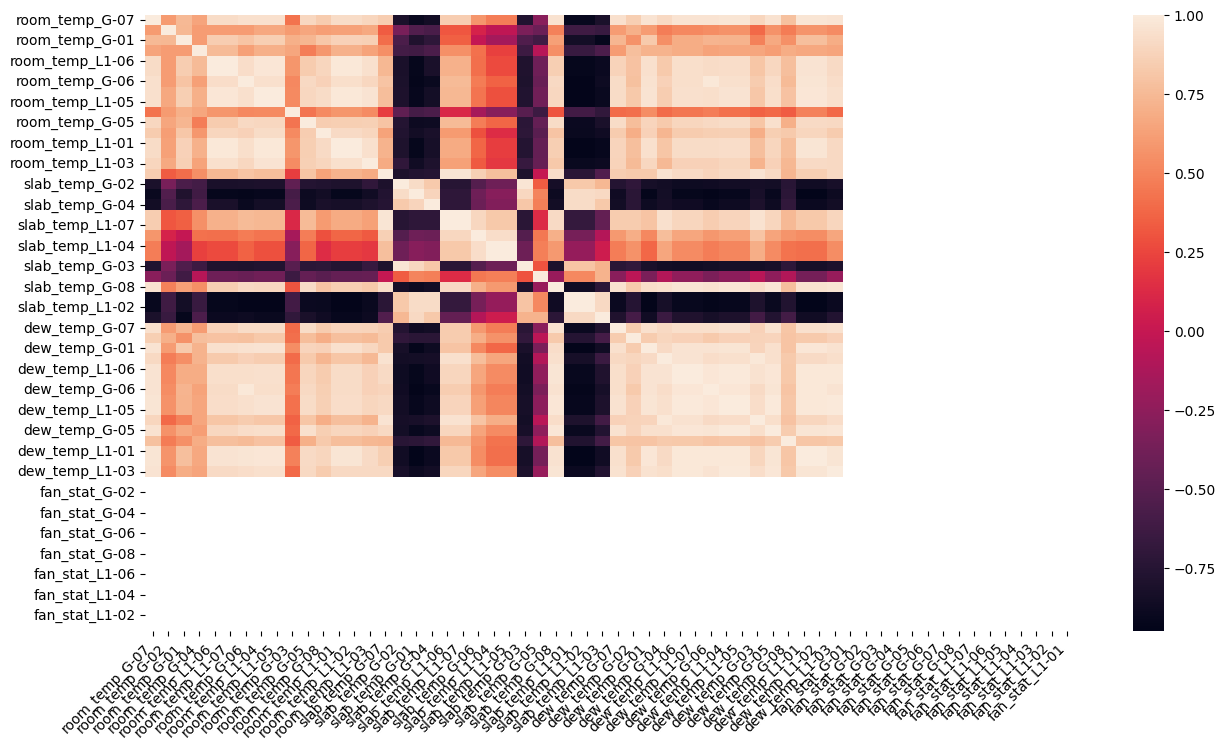

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tính ma trận tương quan từ DataFrame
correlation_matrix = df_raw.corr()

# Vẽ heatmap với Seaborn
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, fmt=".2f", cbar=True)
plt.xticks(rotation=45, ha='right')  # Xoay nhãn trục x để dễ đọc
plt.yticks(rotation=0)  # Giữ nhãn trục y không bị xoay
plt.show()


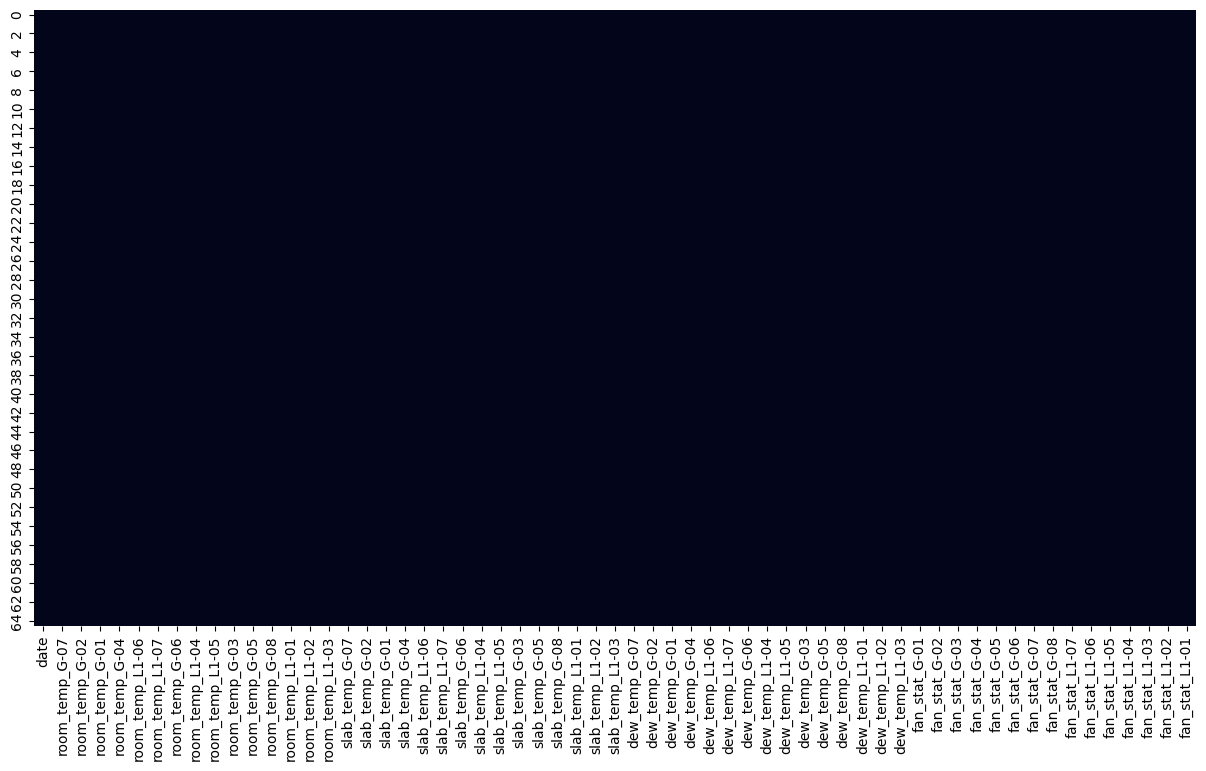

In [7]:
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.heatmap(df_raw.isna(), cbar=False)
plt.show()

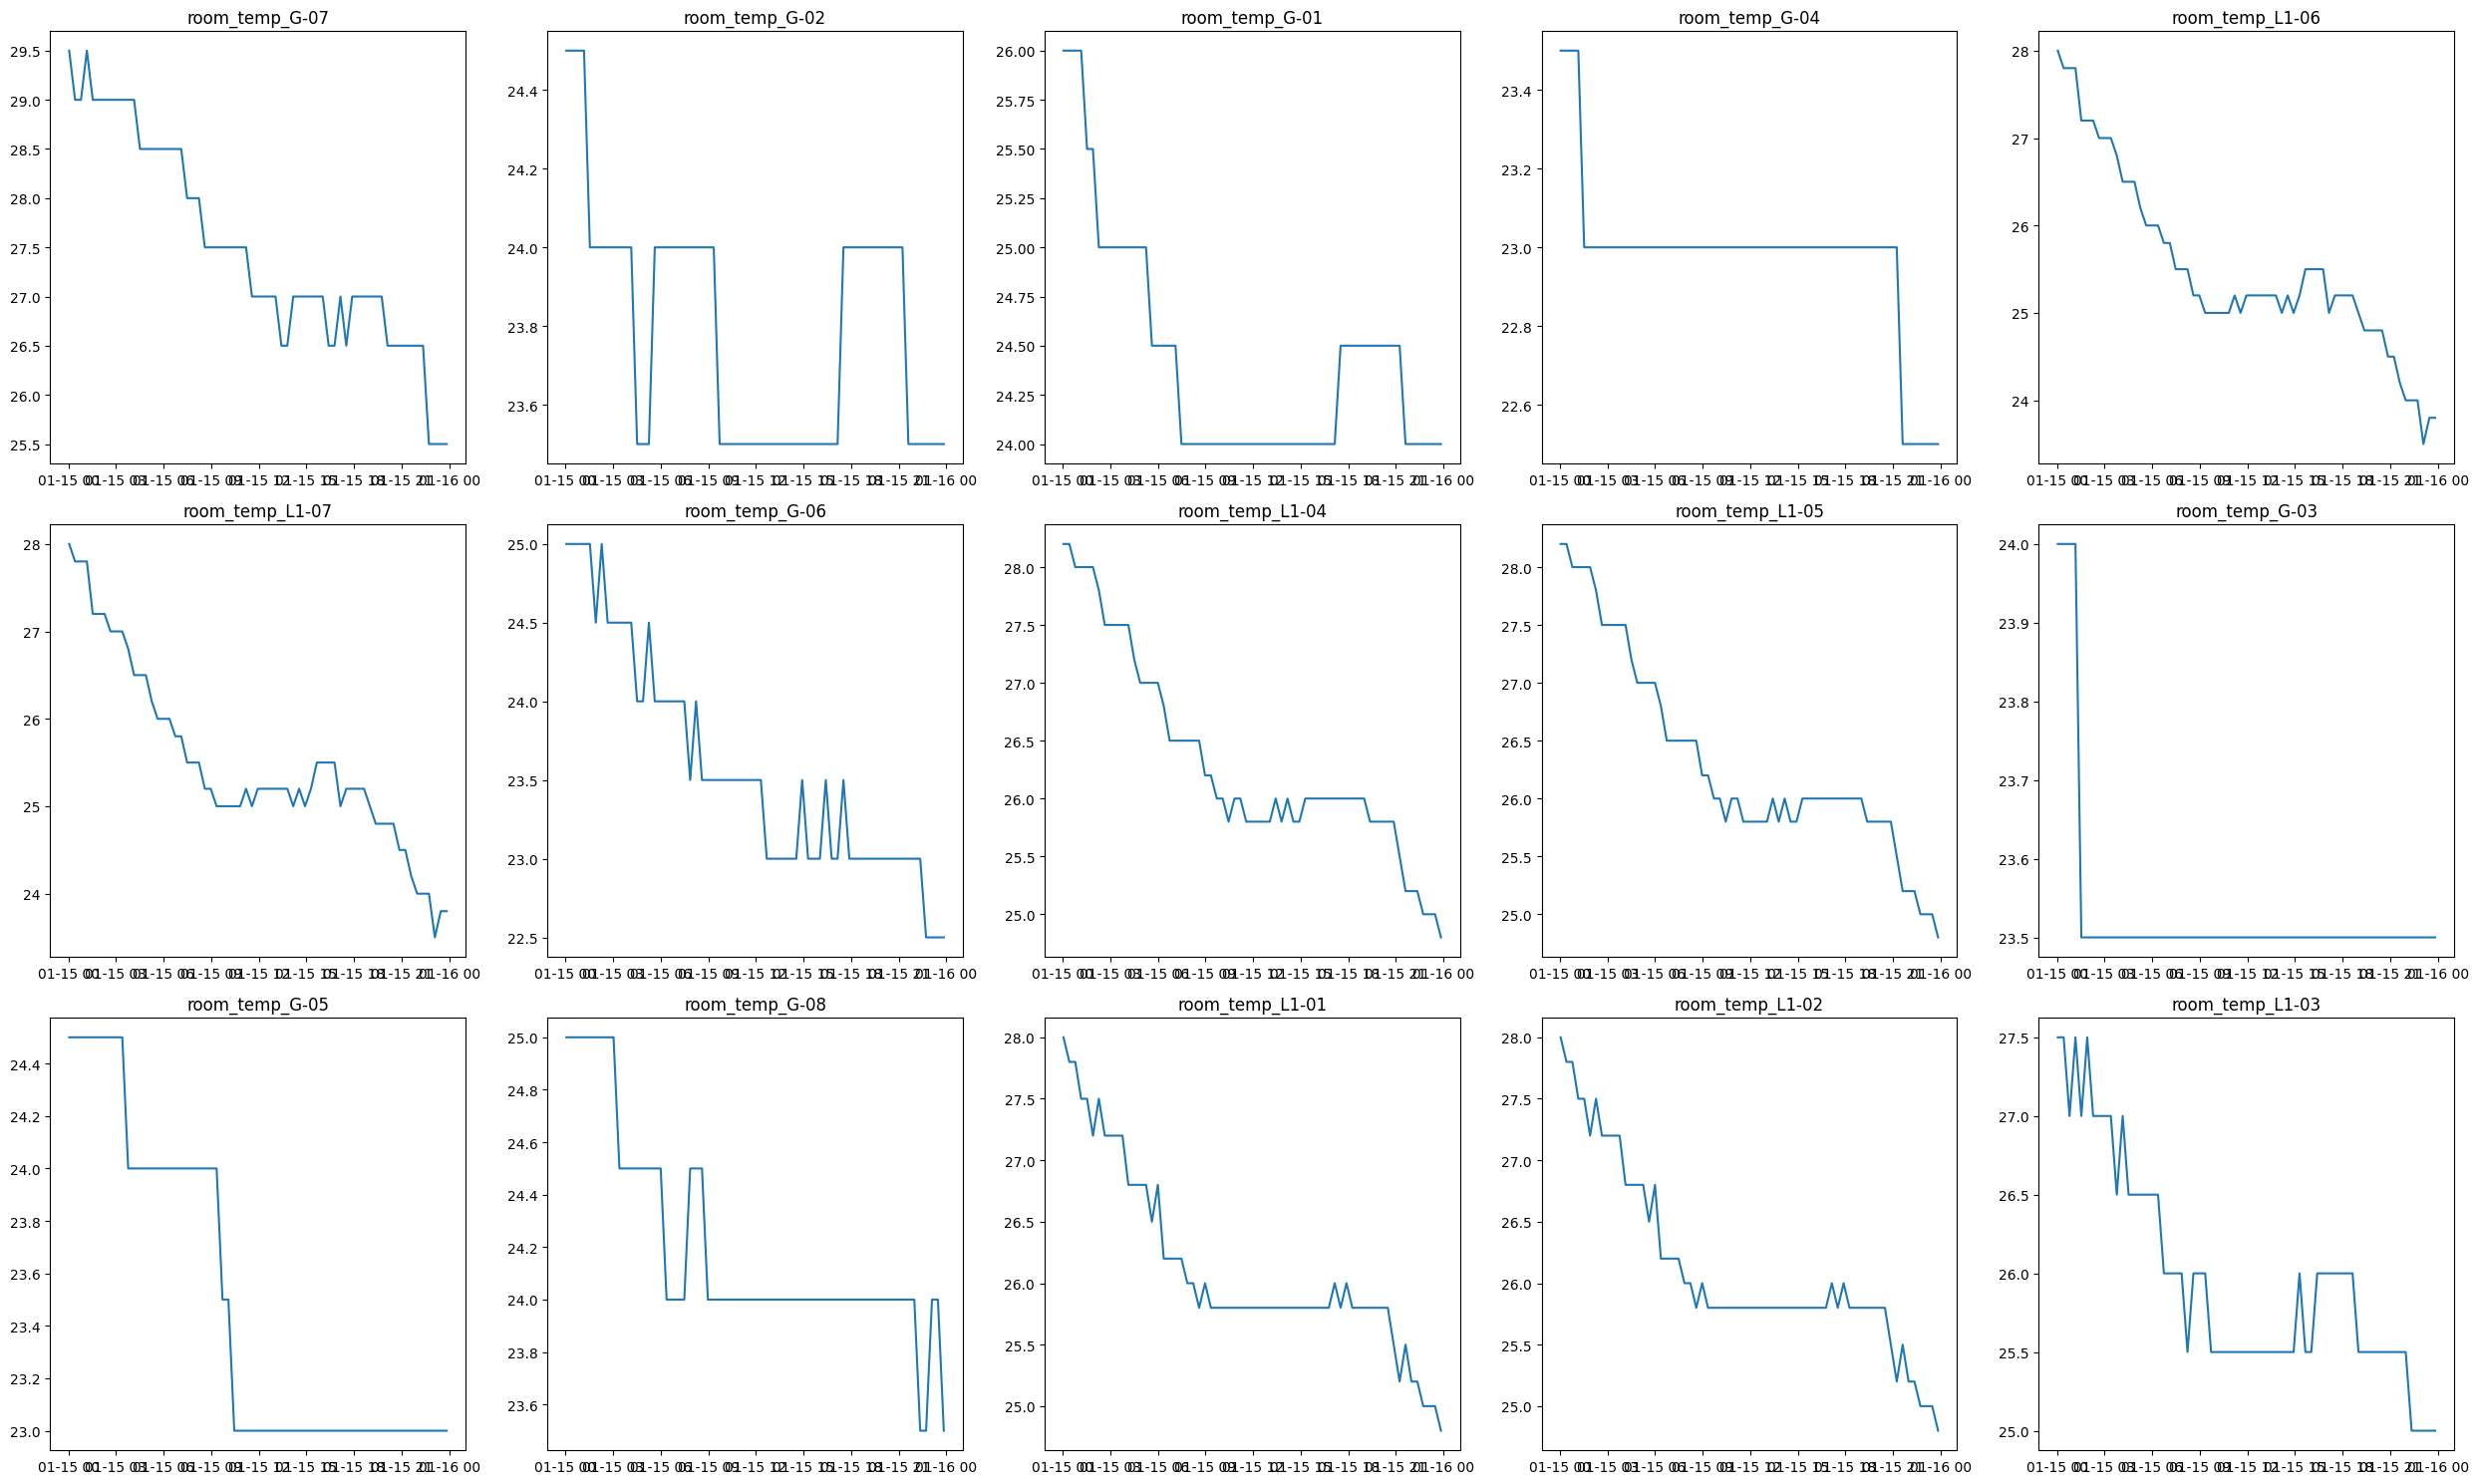

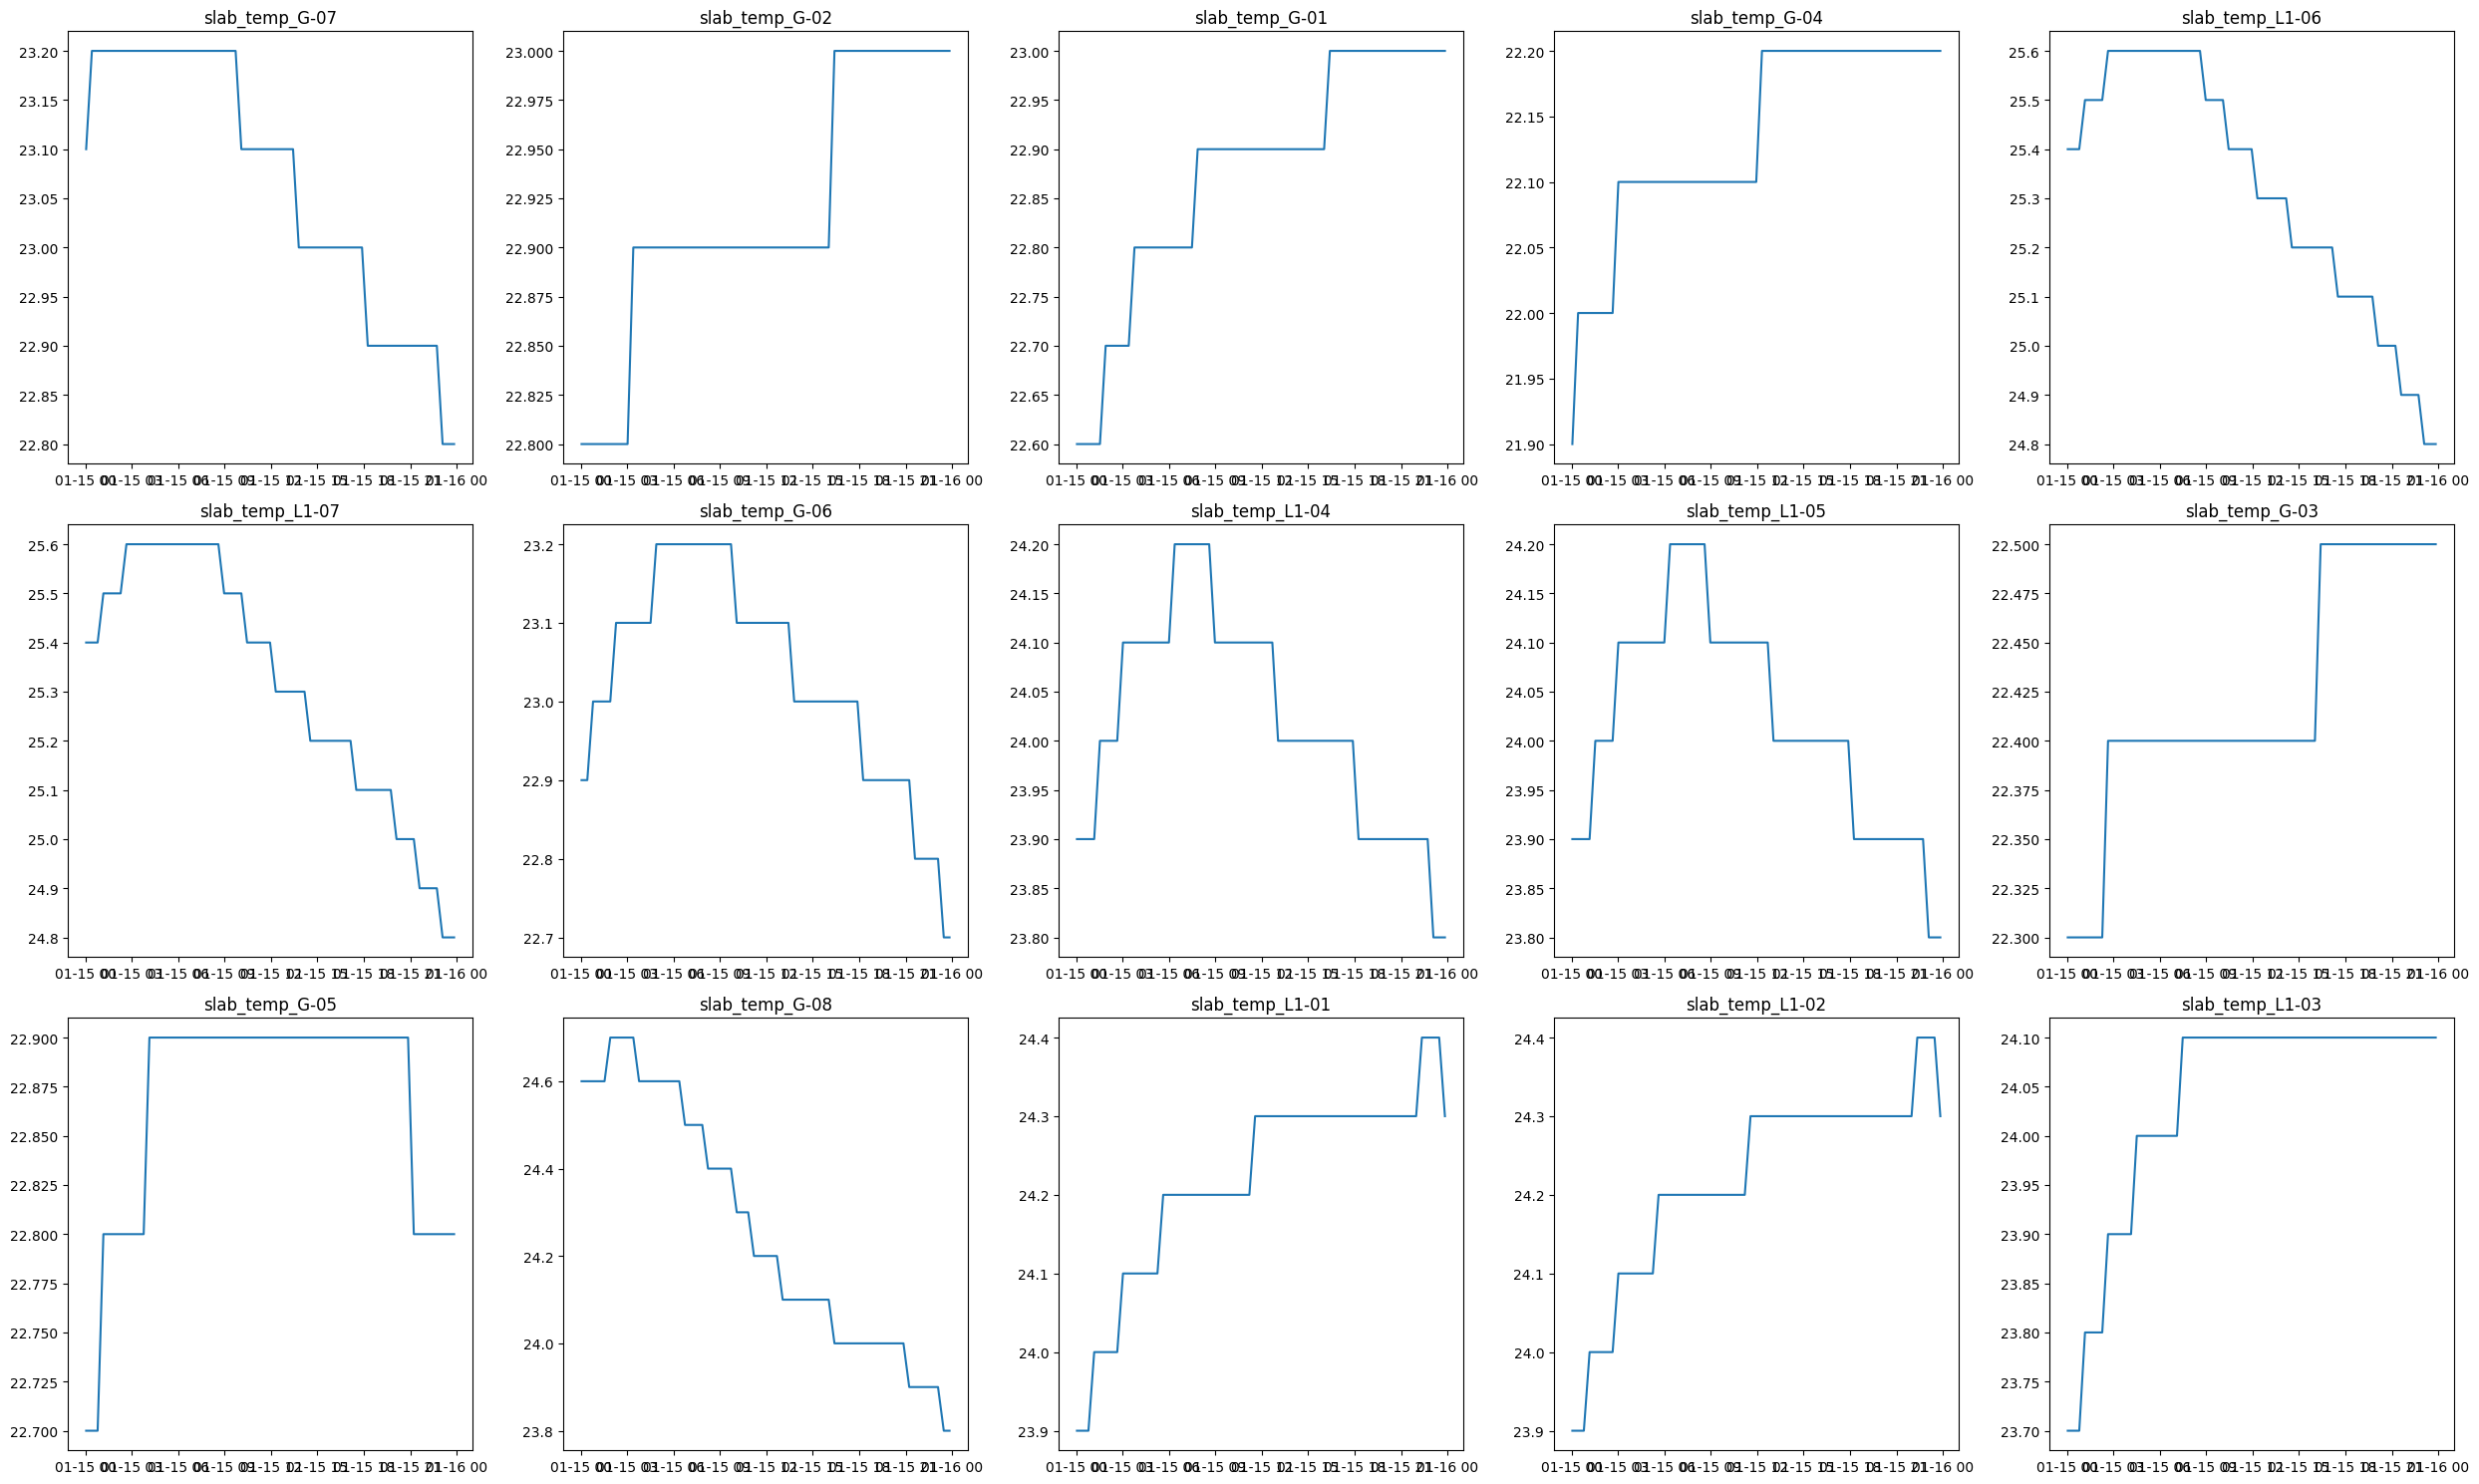

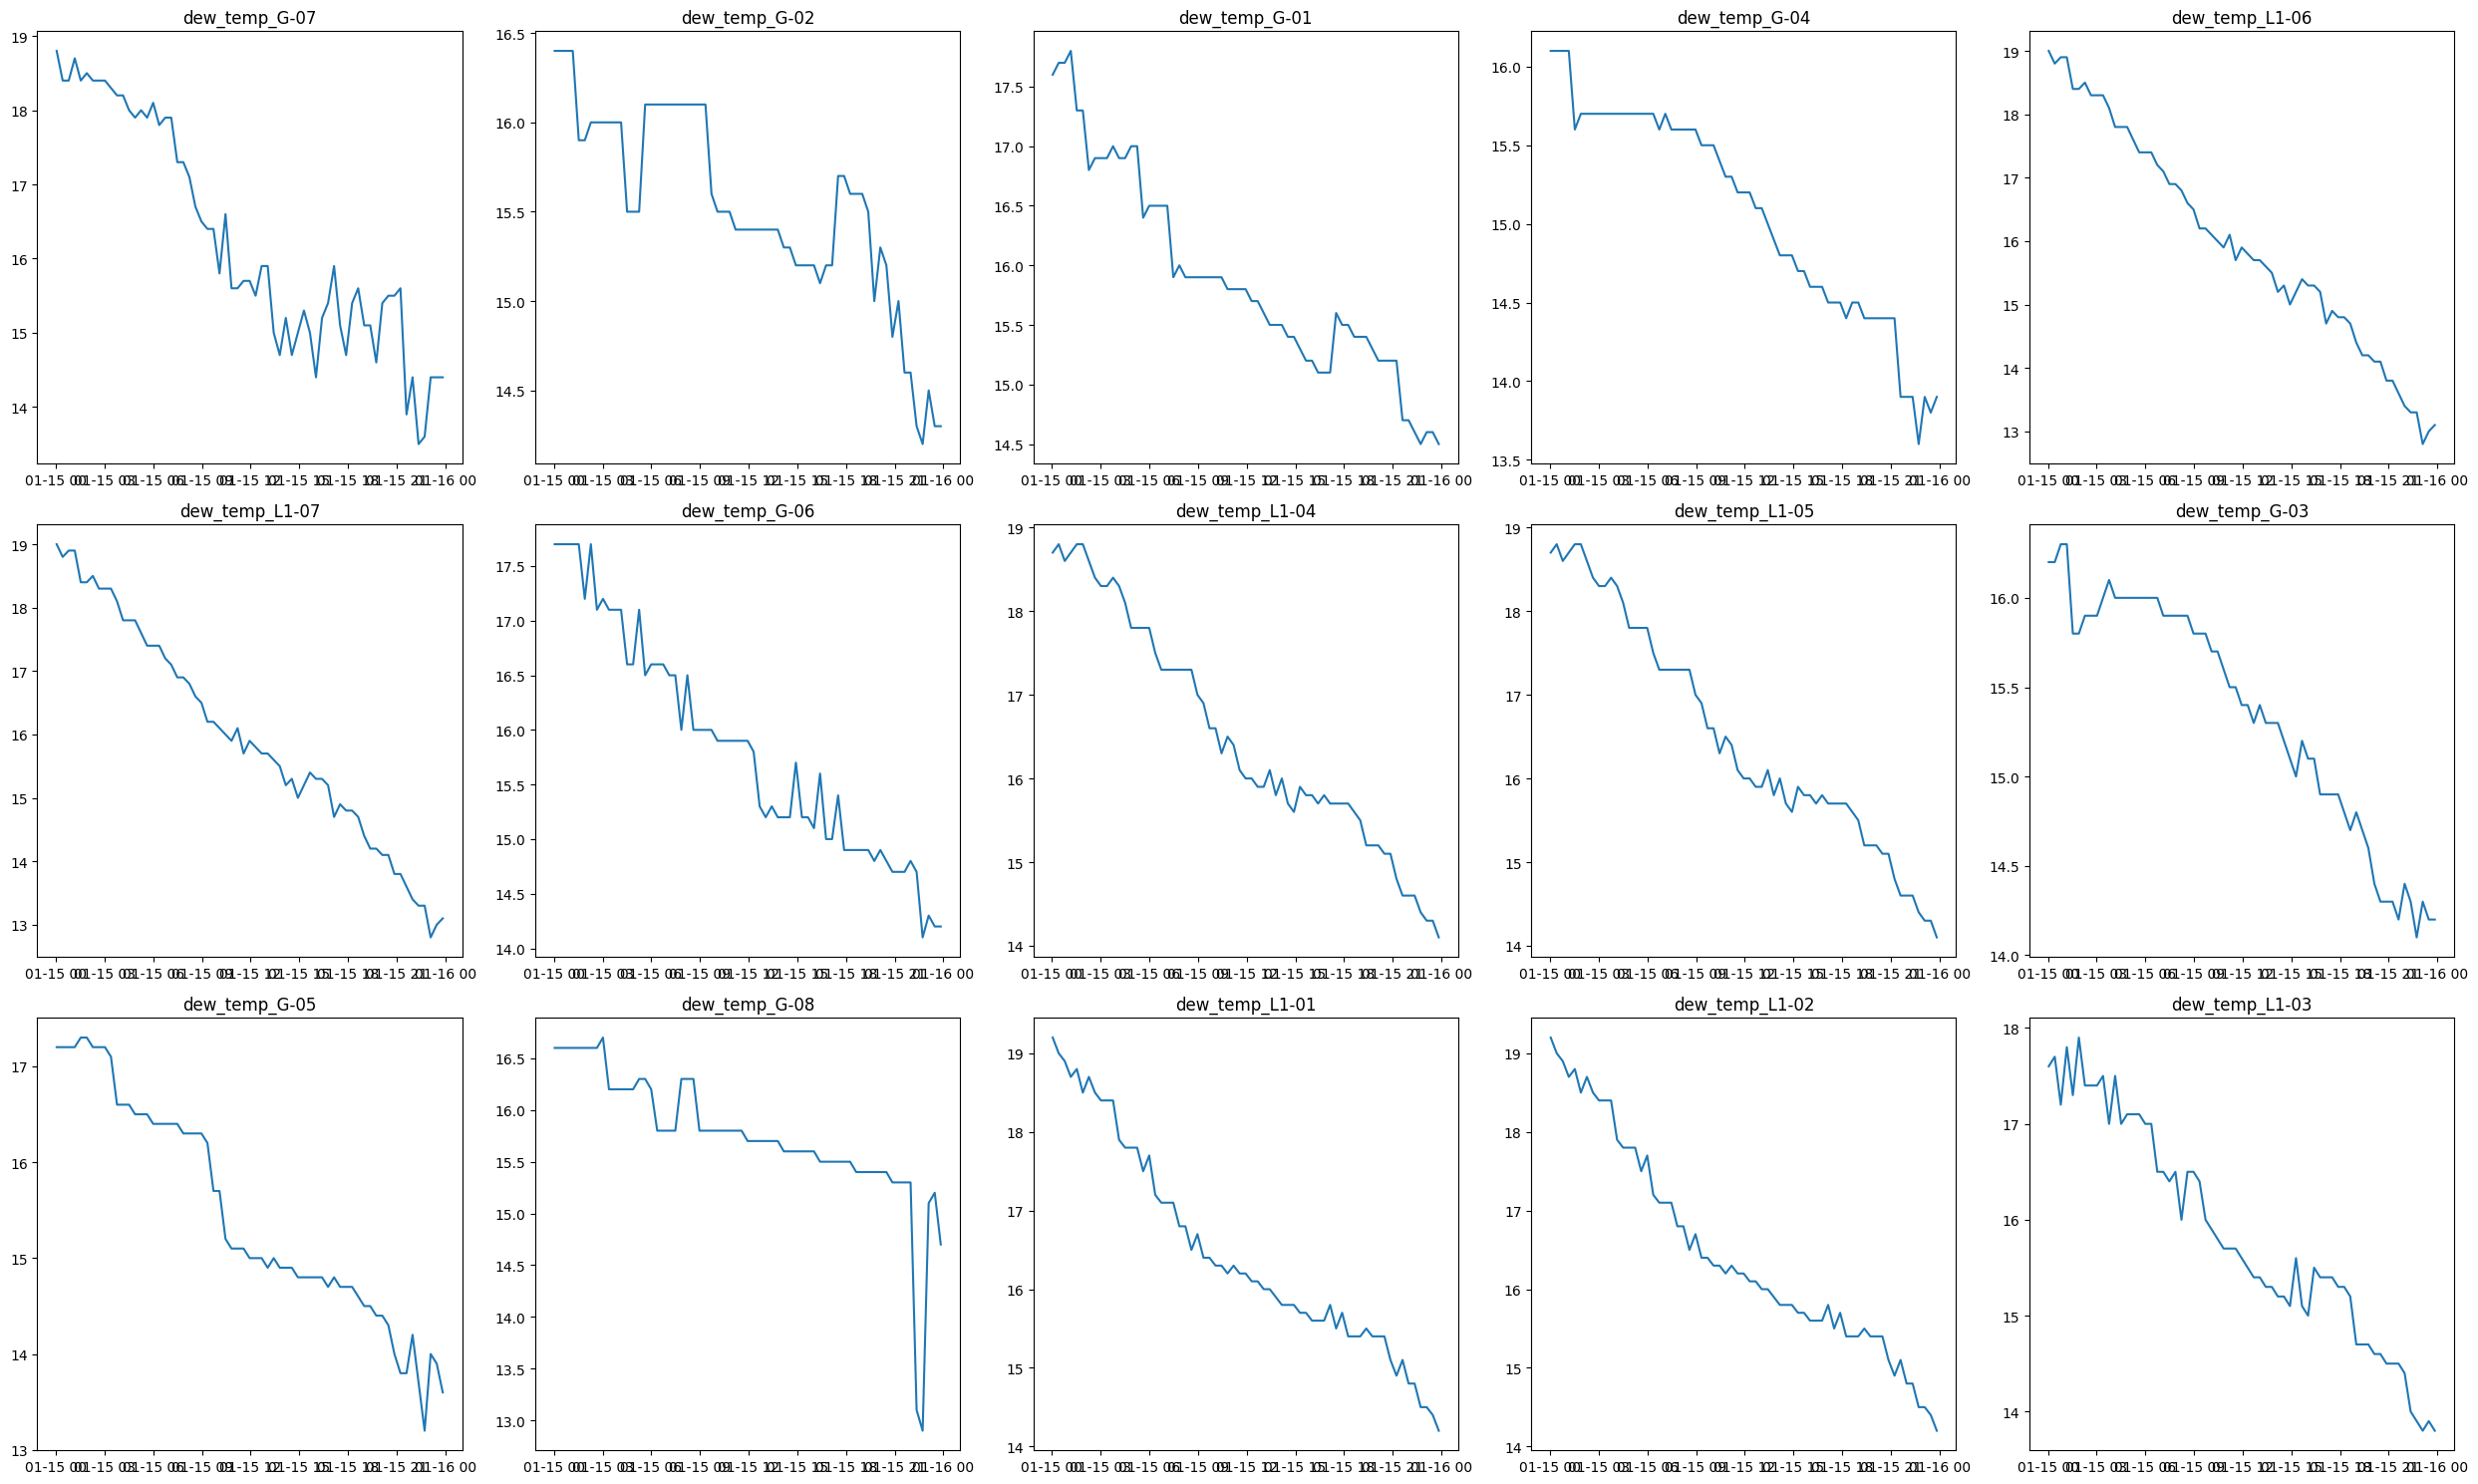

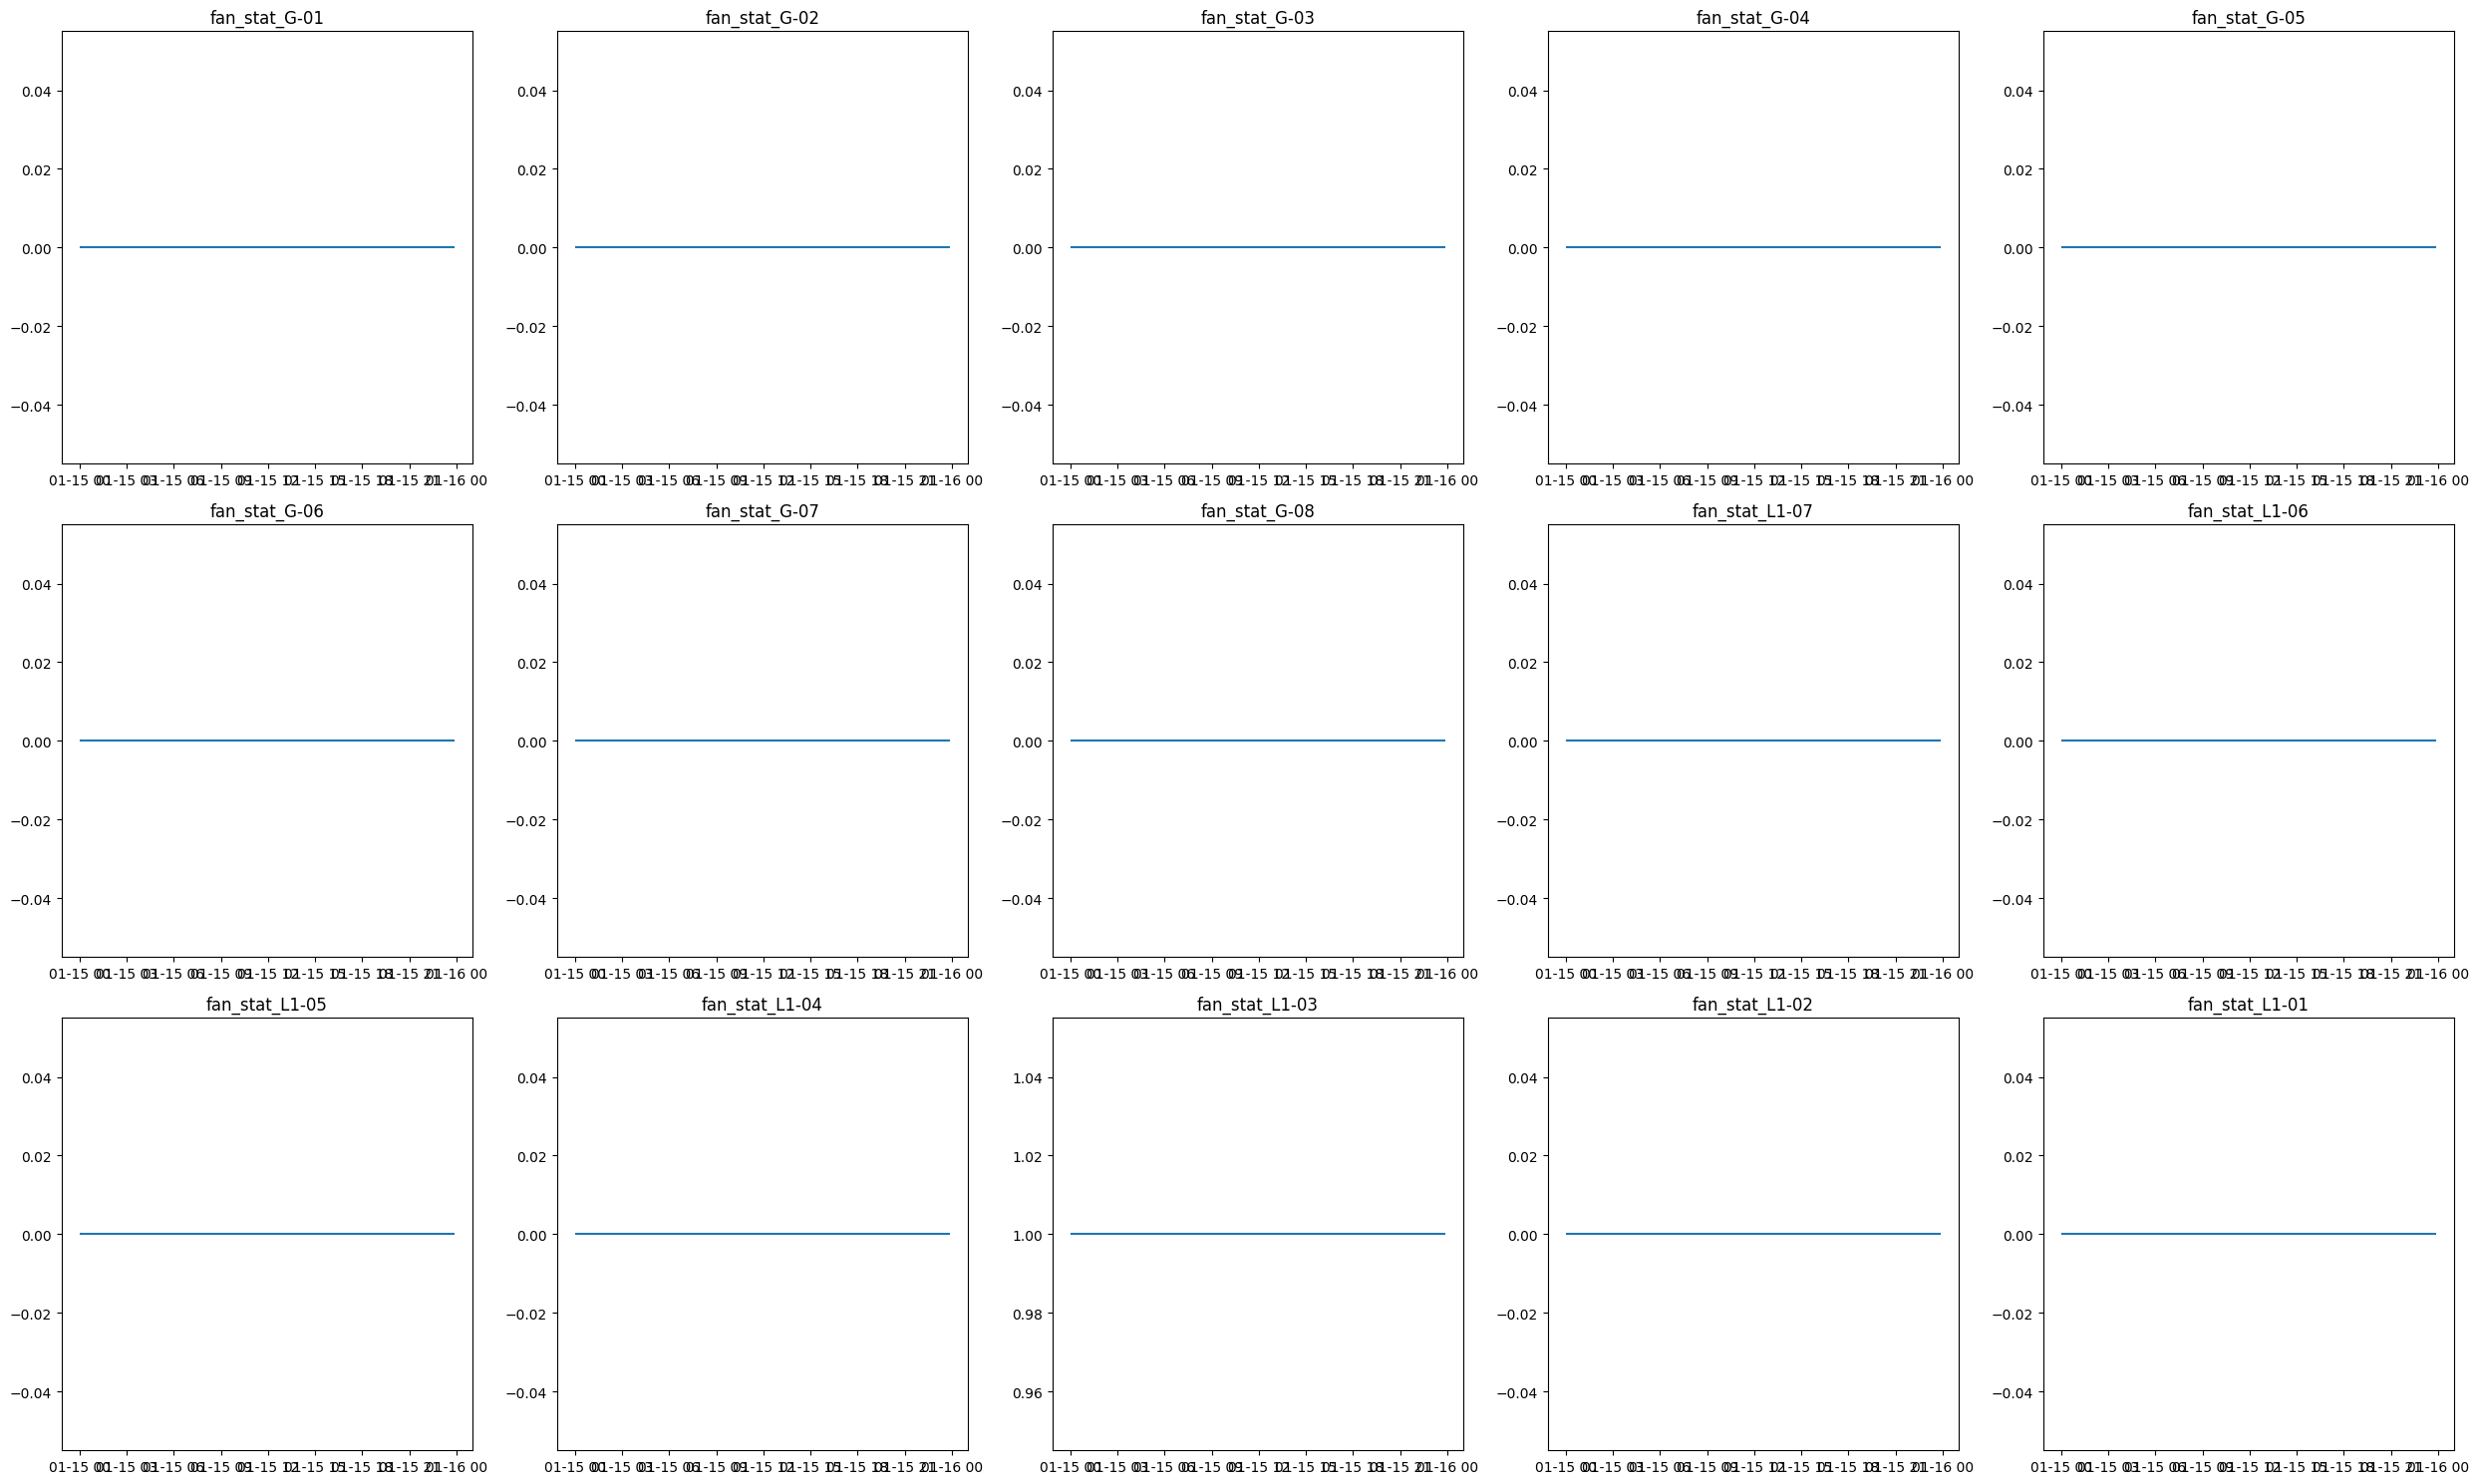

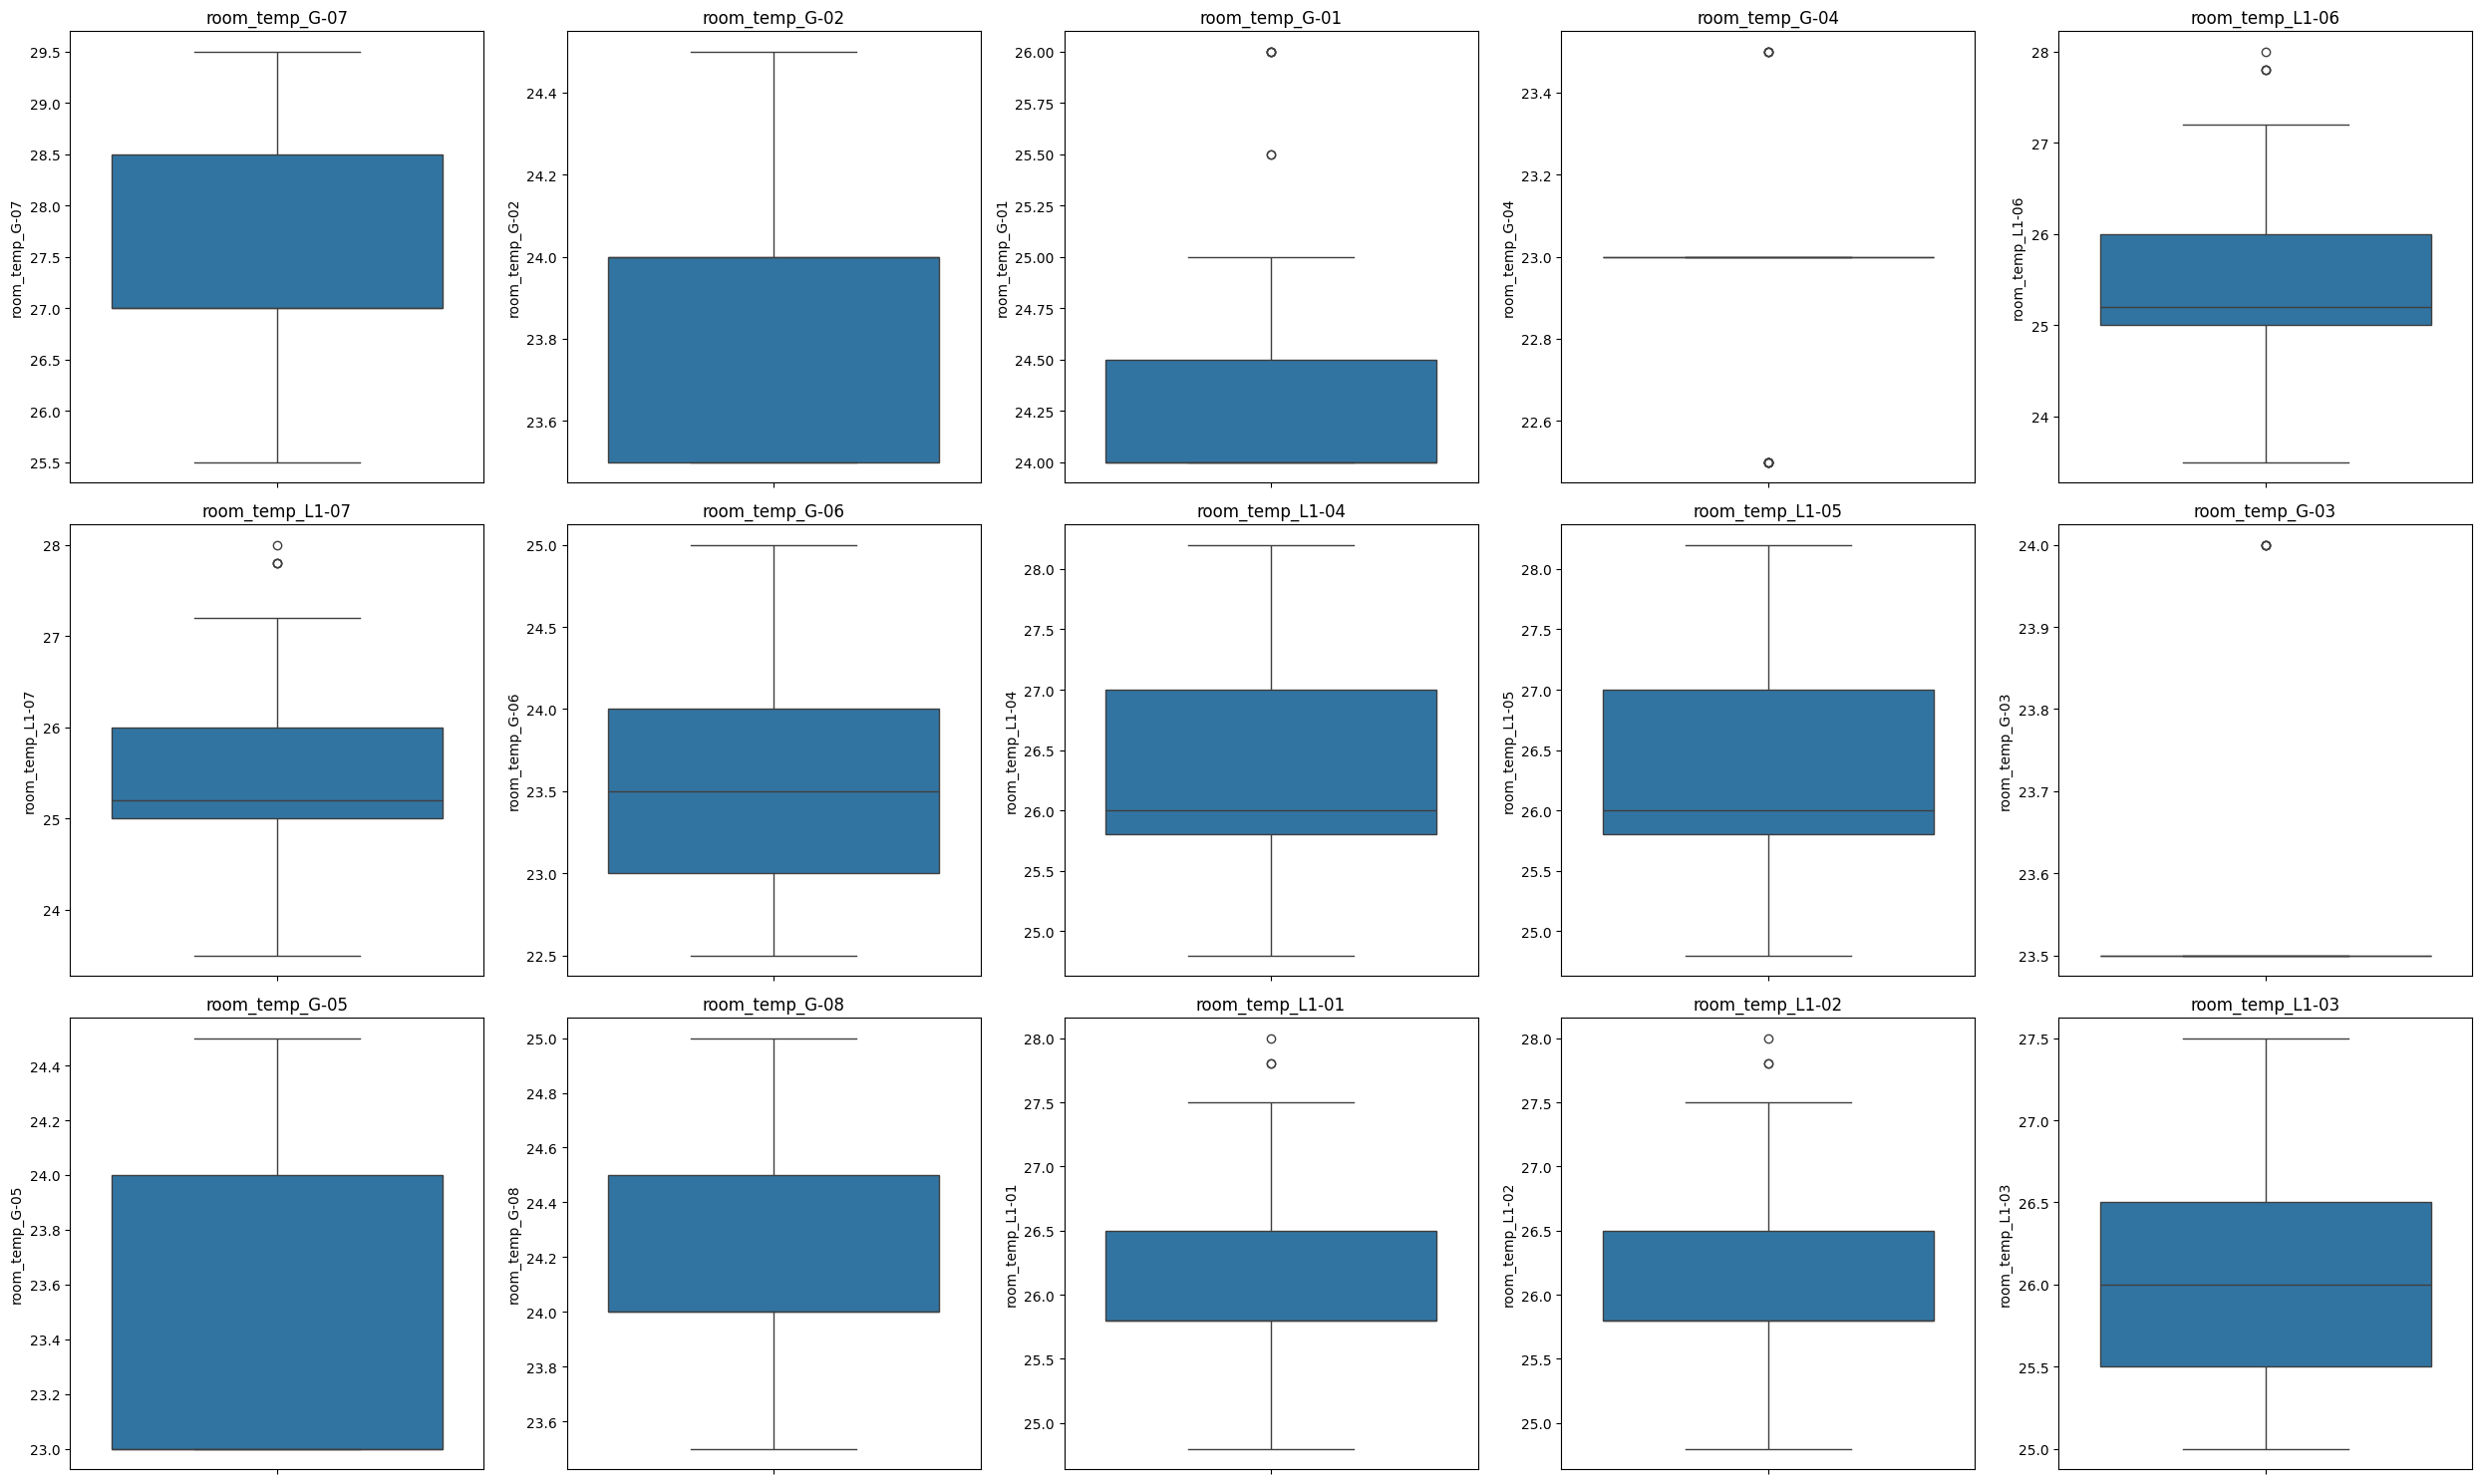

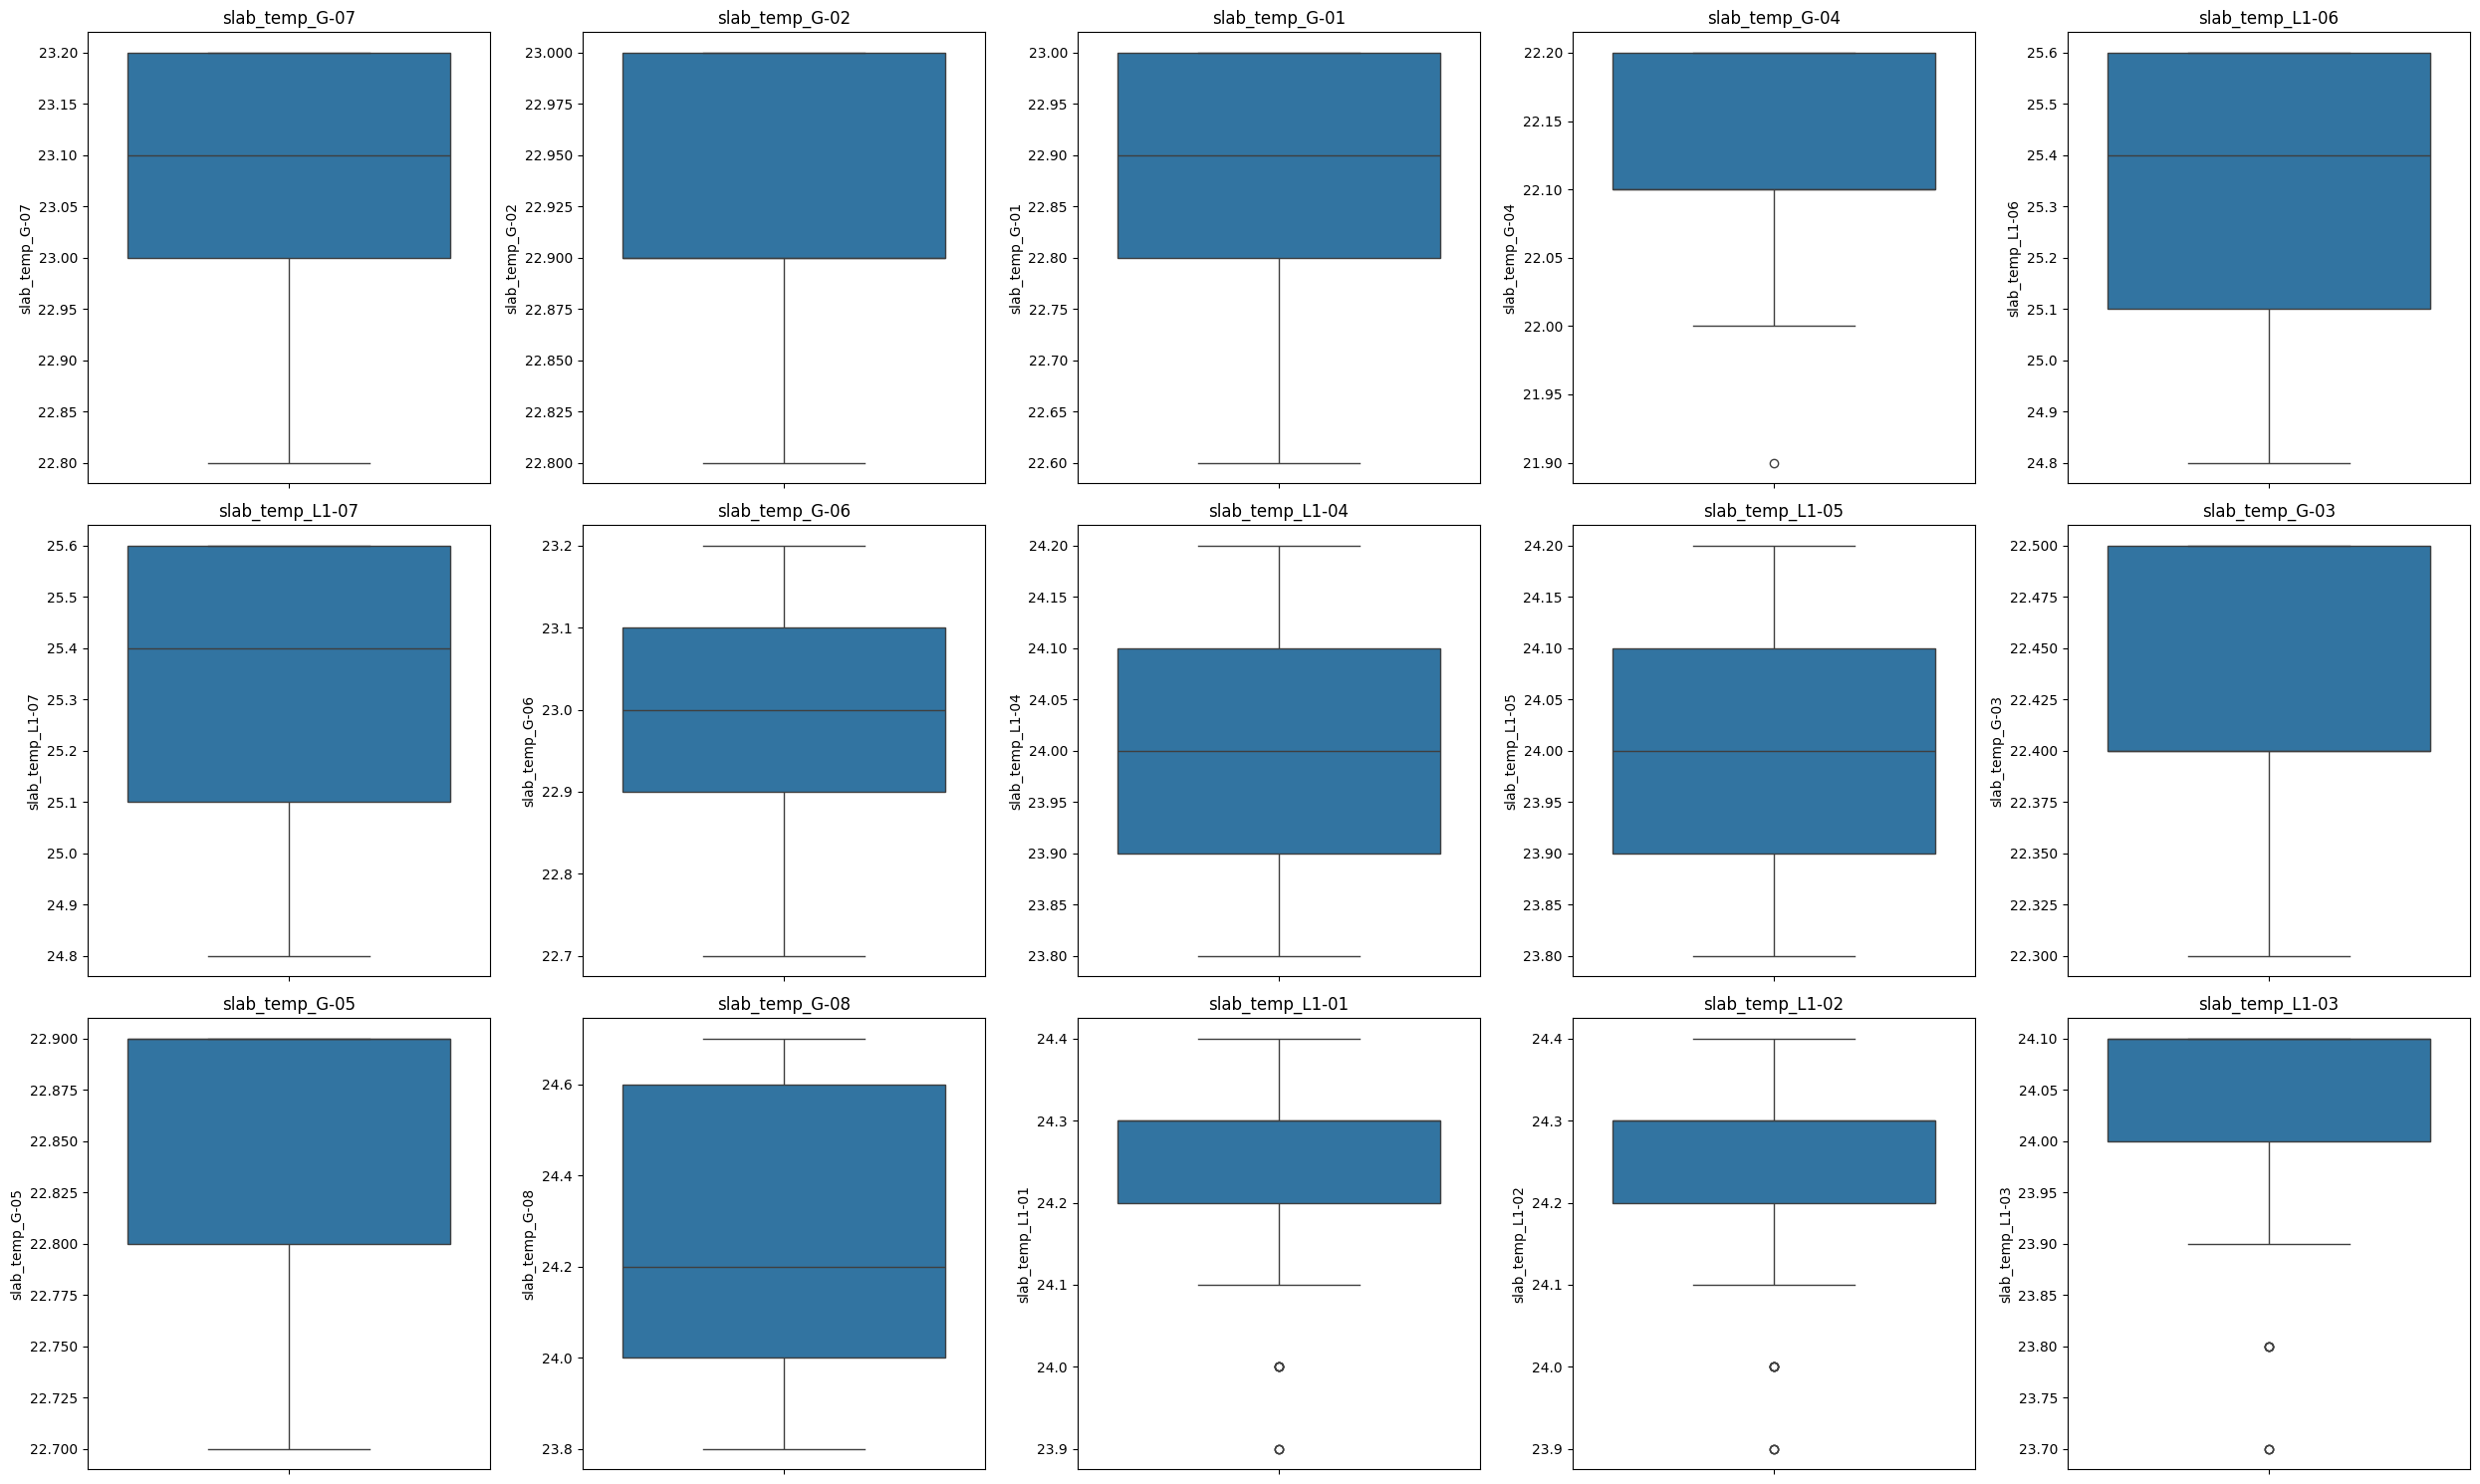

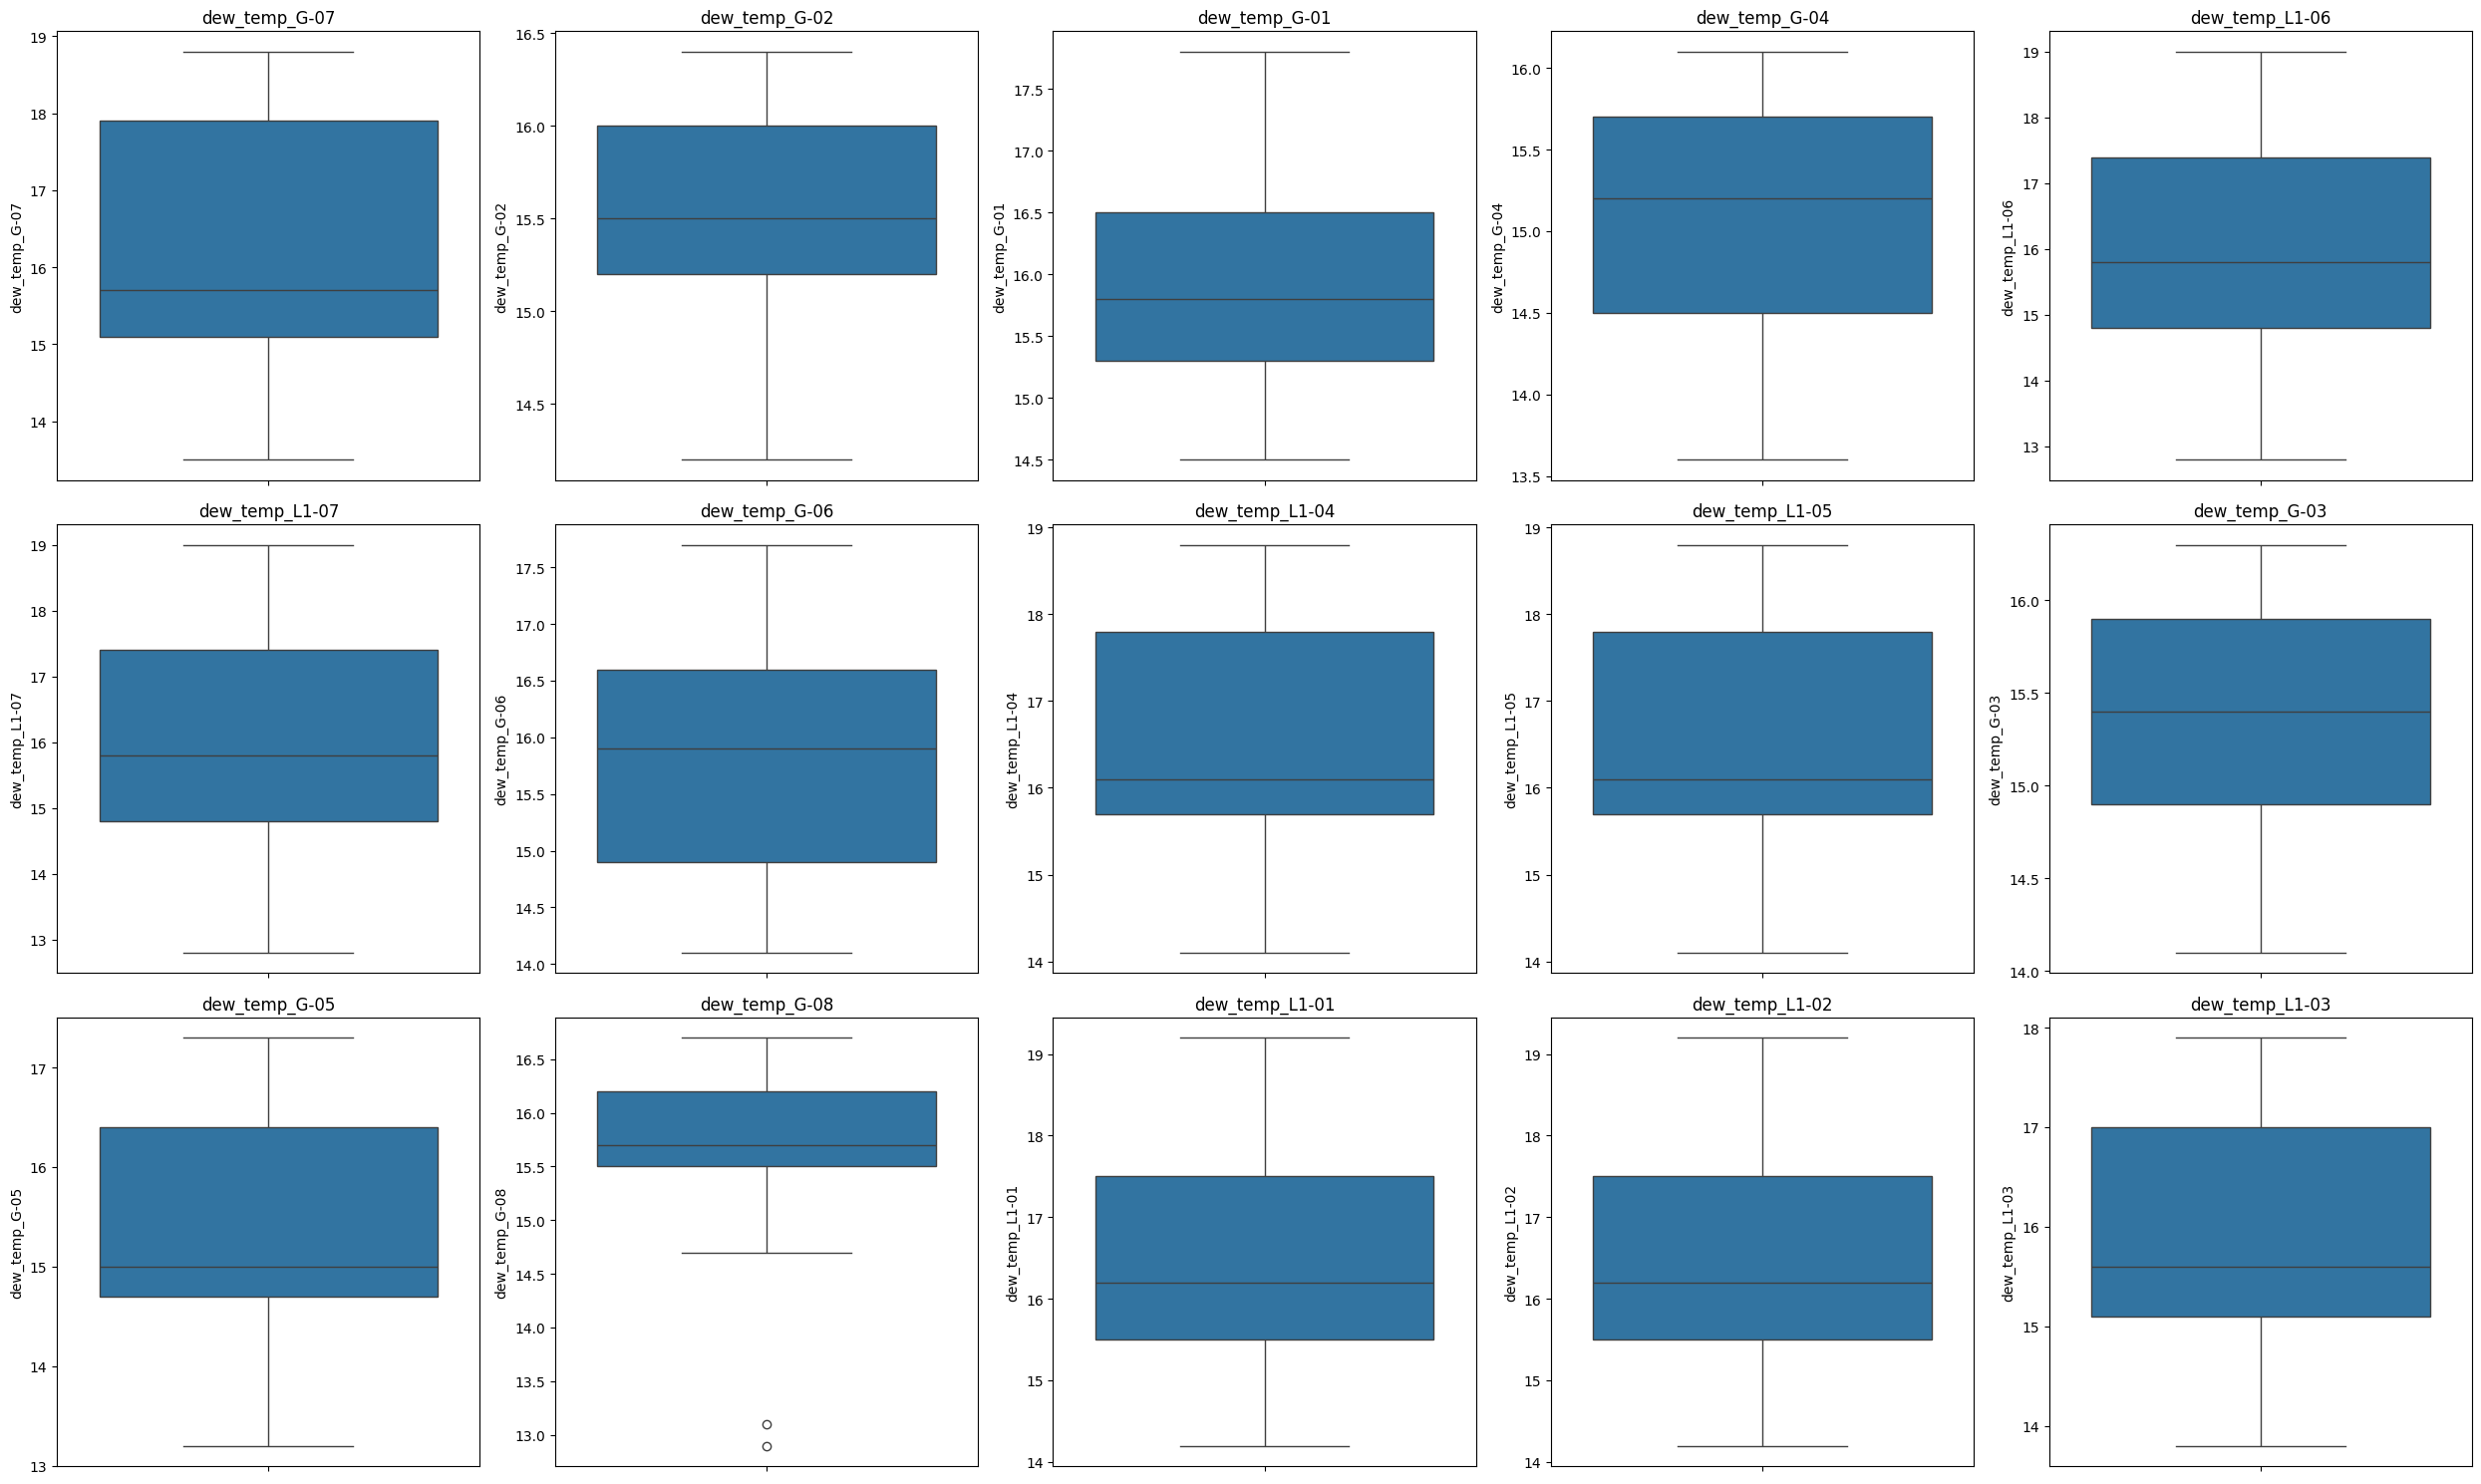

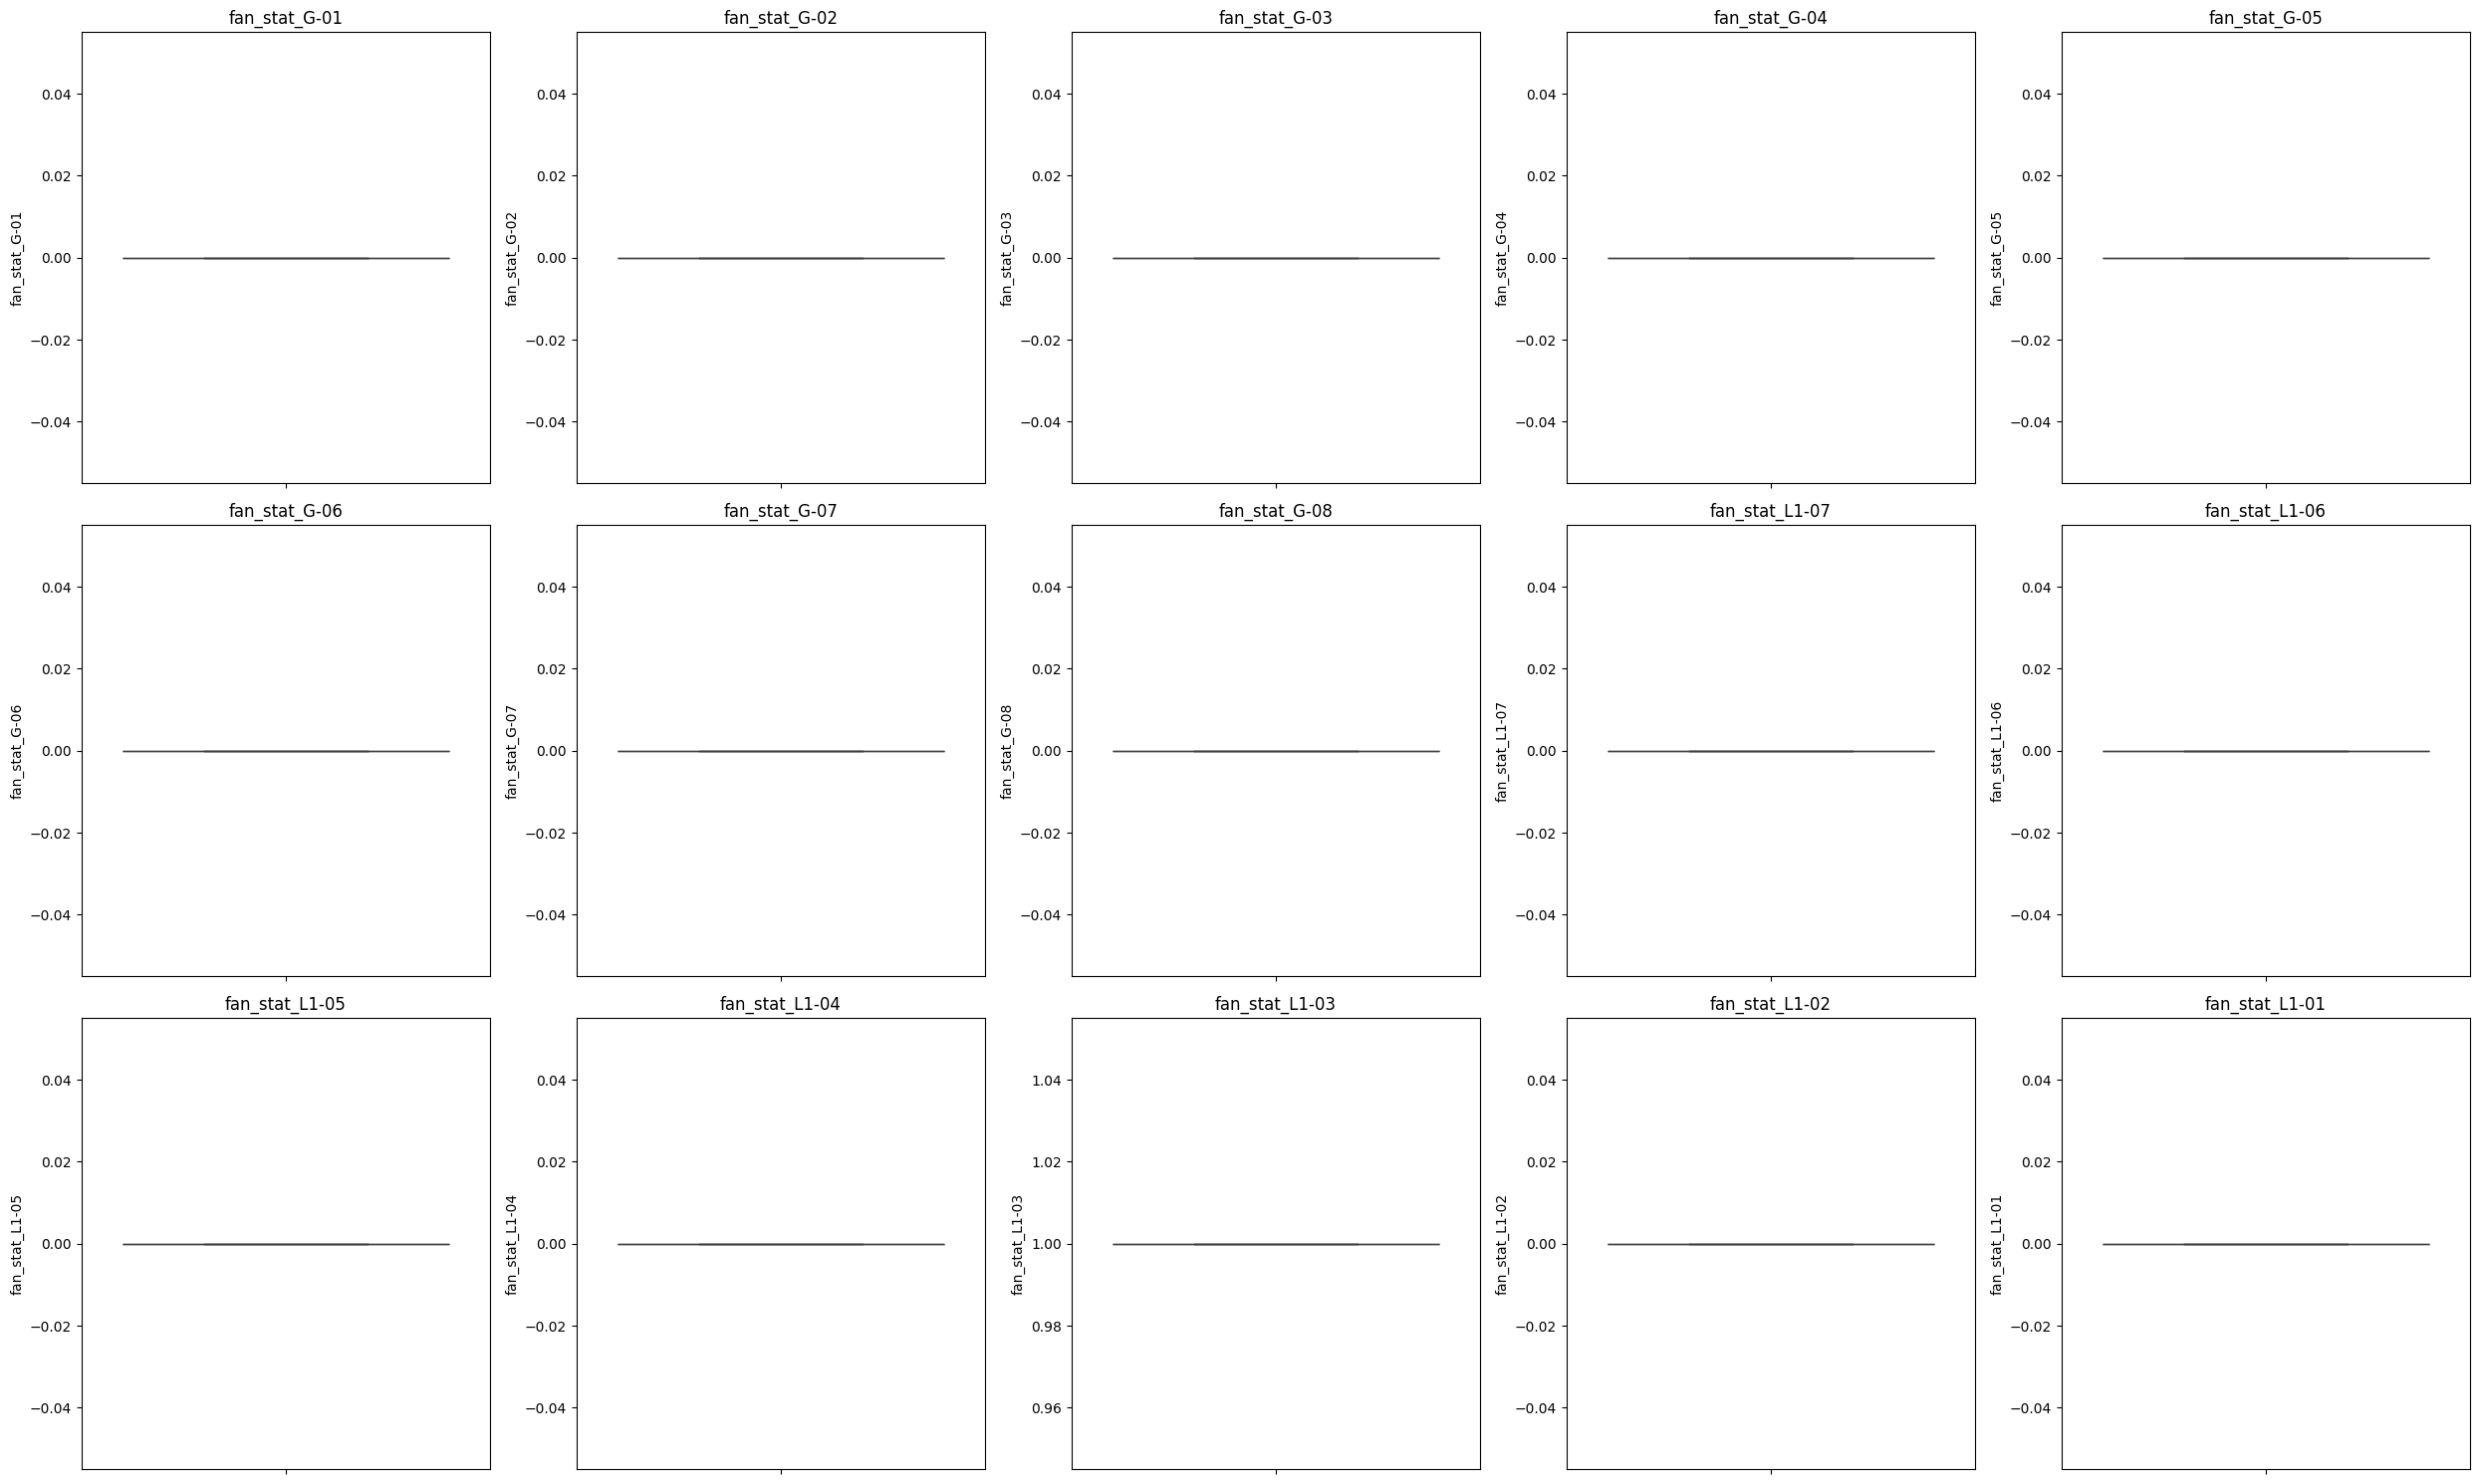

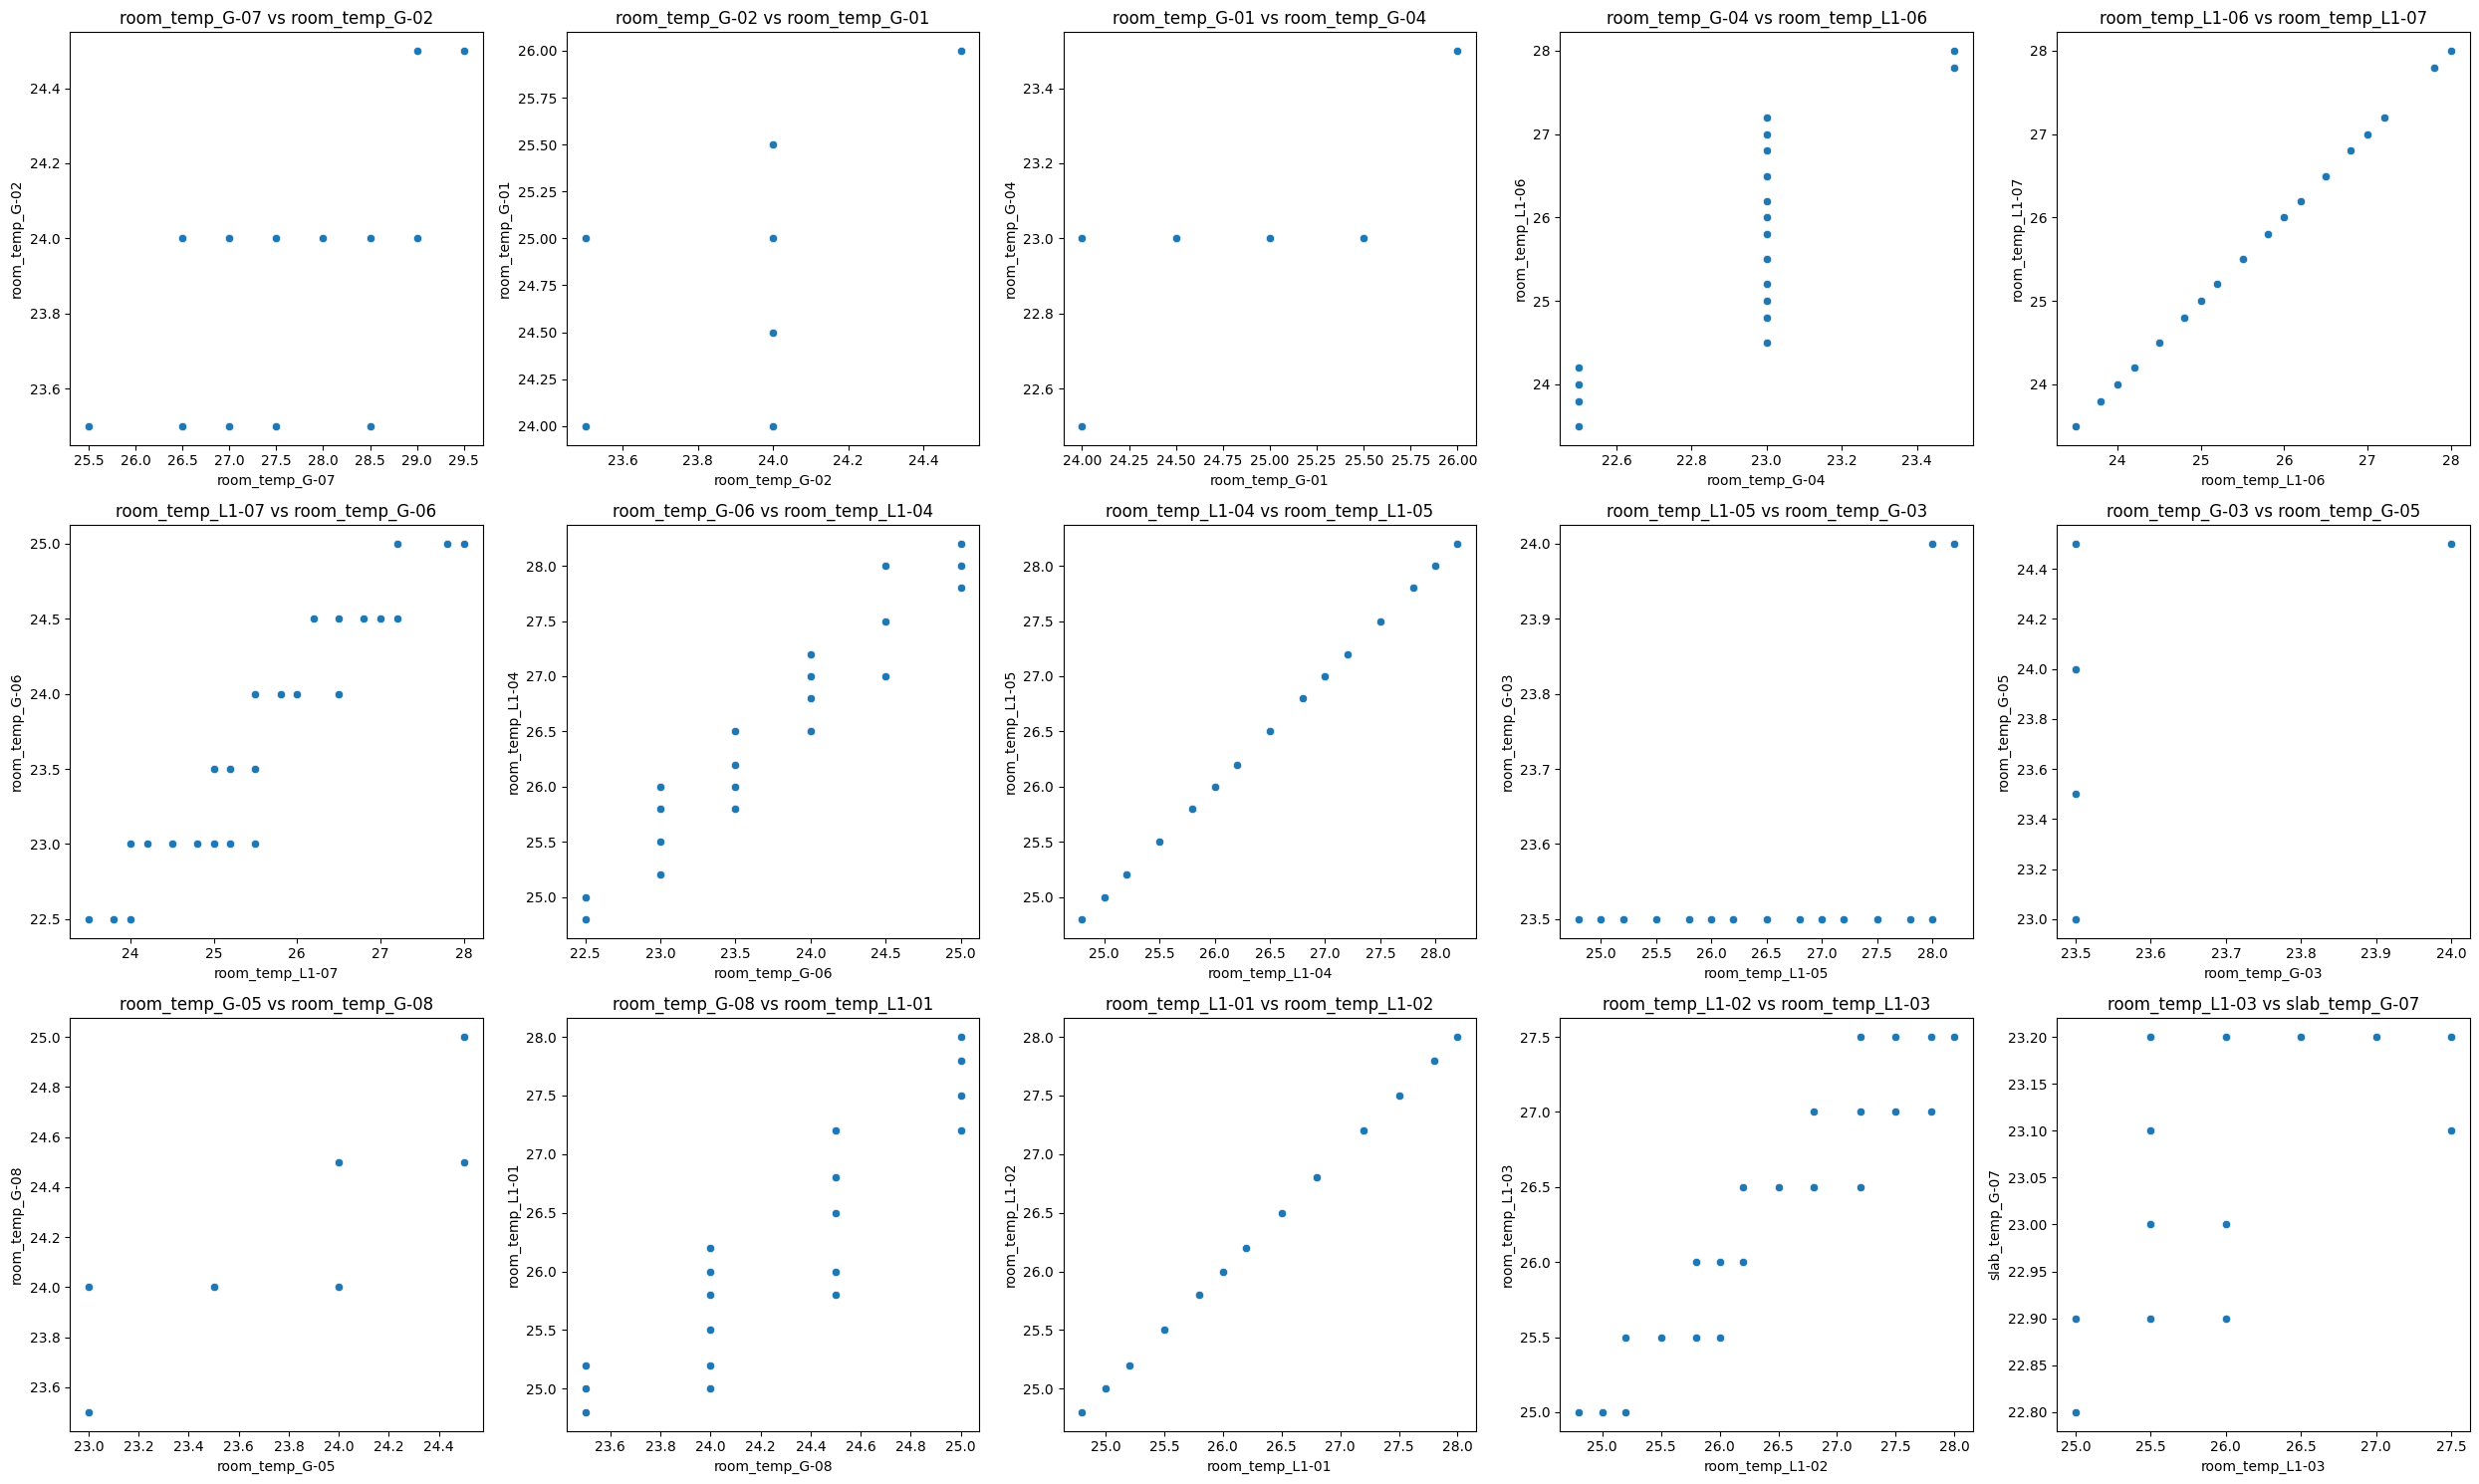

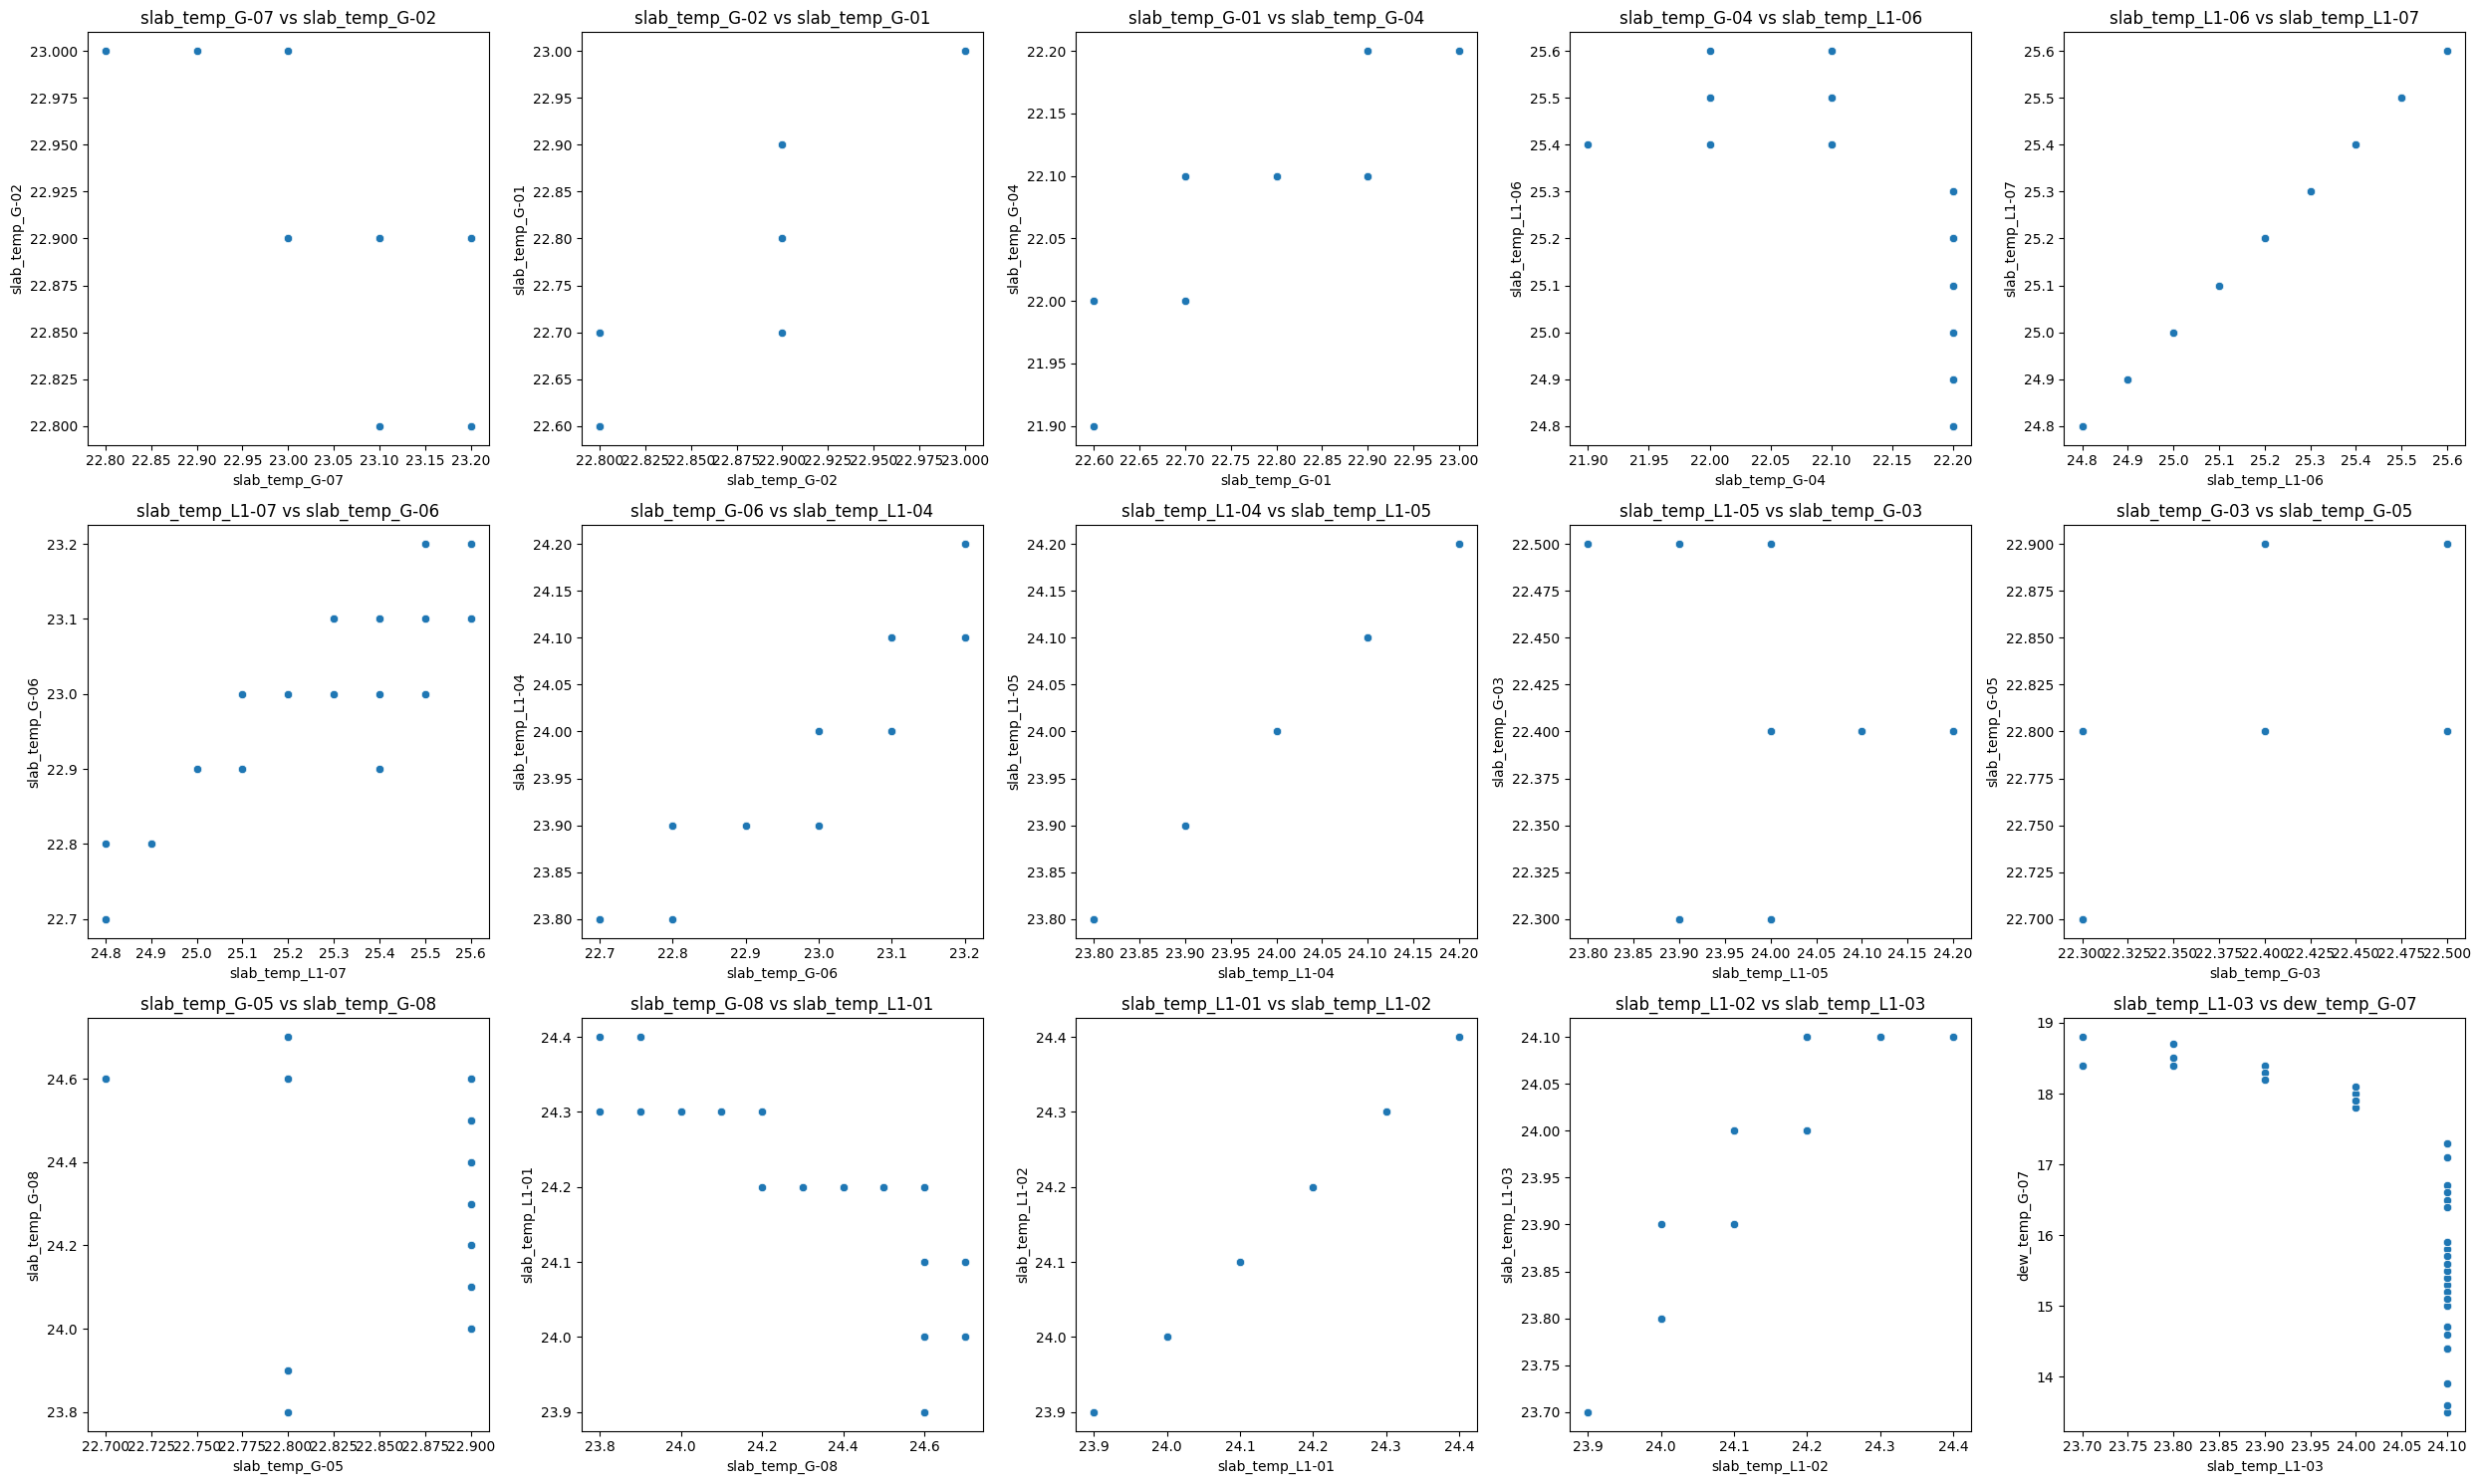

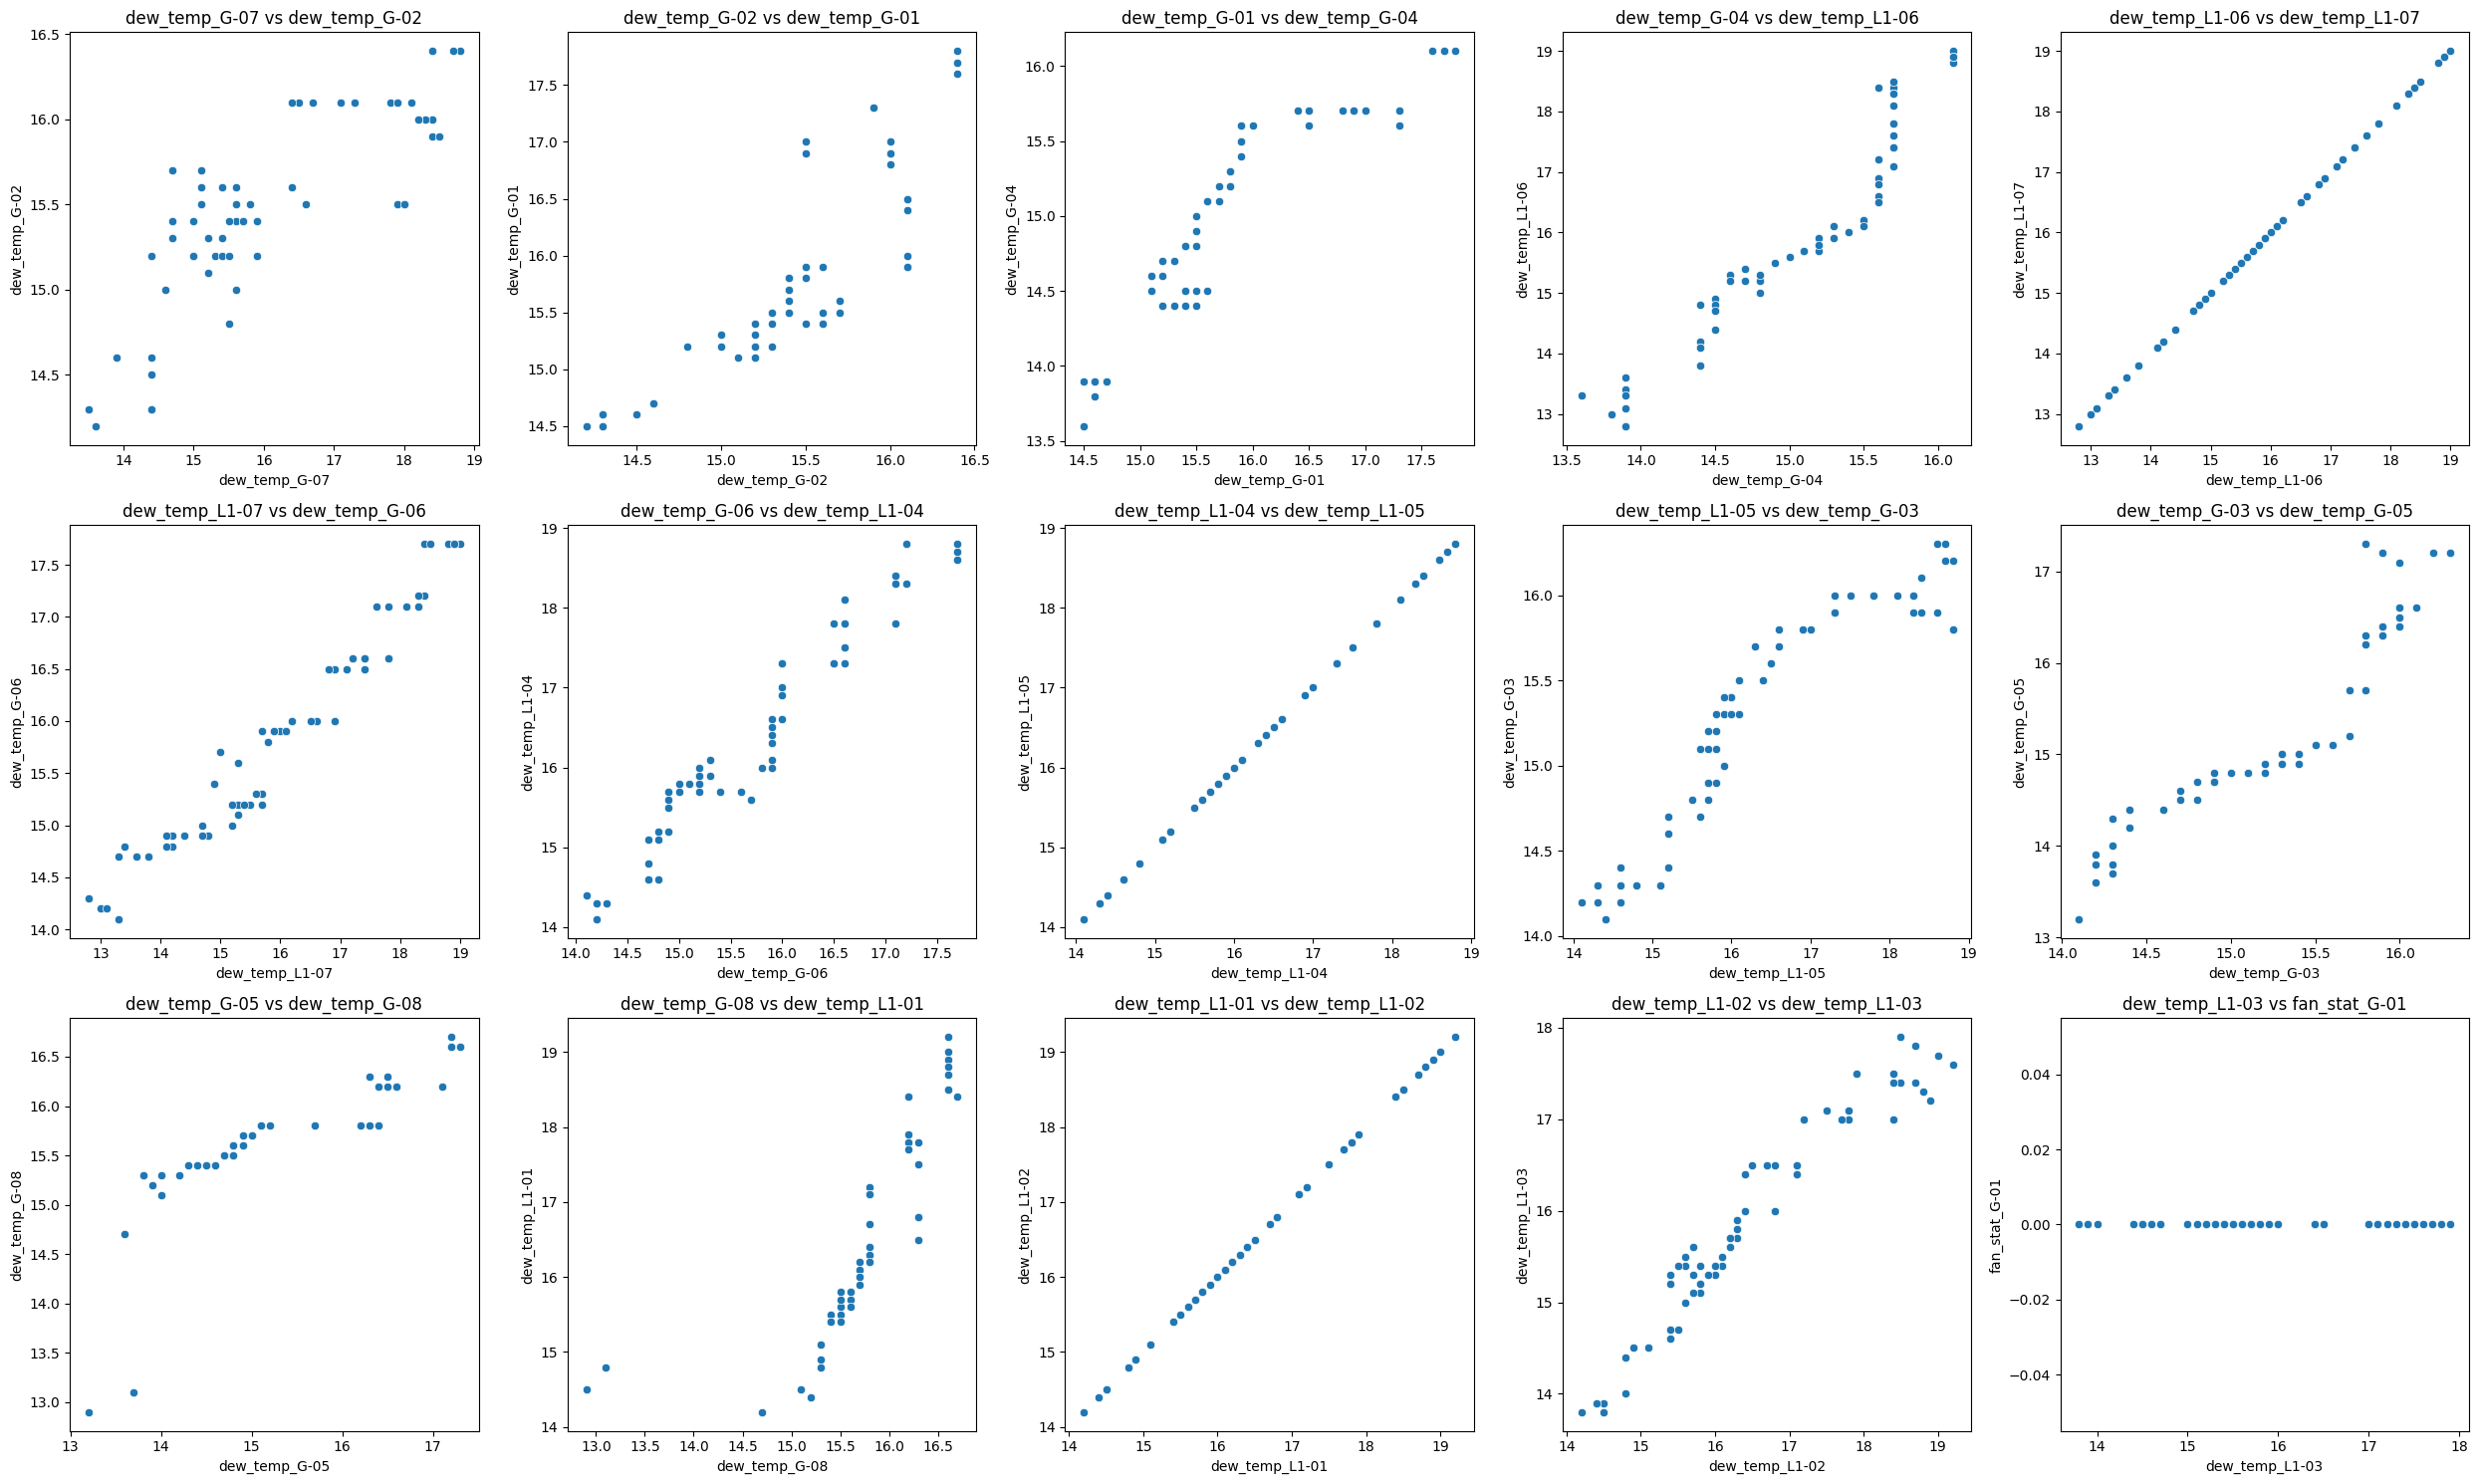

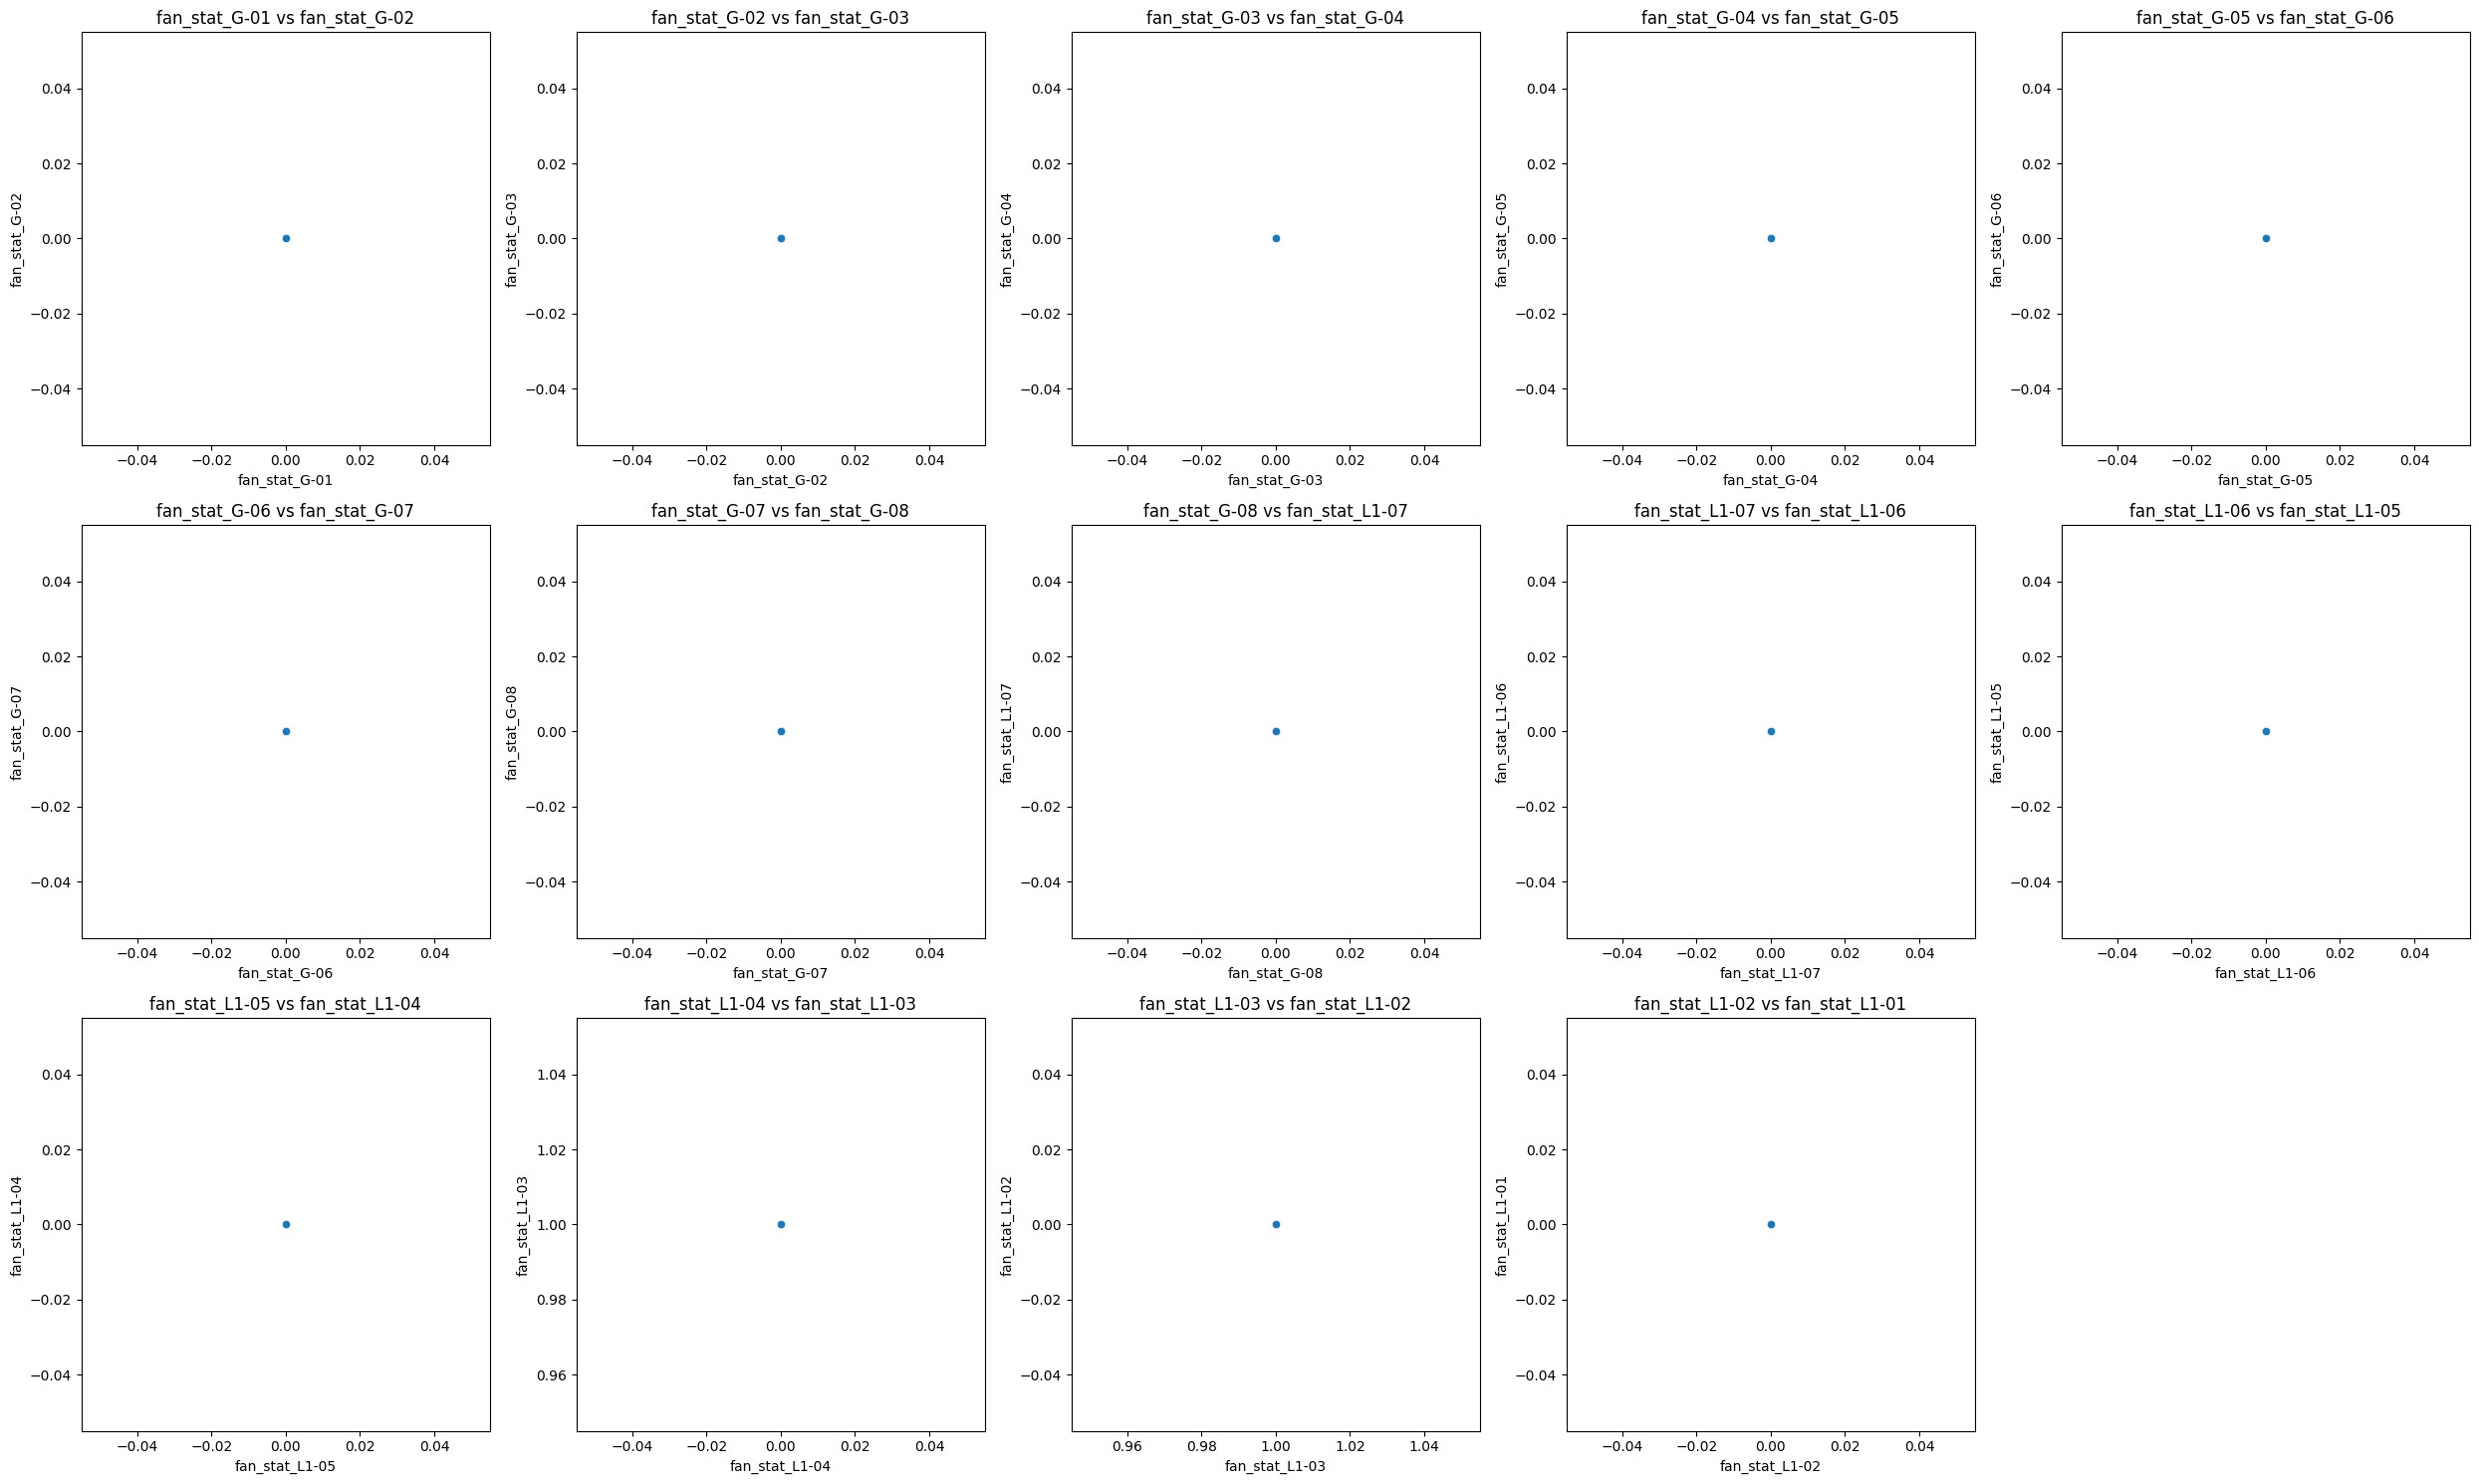

In [8]:
# Tạo một plot chung cho mỗi loại biểu đồ (line, box, scatter)
# Sử dụng subplots để vẽ nhiều biểu đồ trong một figure
# Chọn các cột dữ liệu không phải là timestamp
data_columns = df_raw.columns.drop('date')
num_cols = len(data_columns)

# Thiết lập số lượng subplot cho mỗi loại biểu đồ
# Chọn một kích thước hợp lý cho mỗi subplot
rows_per_plot = 3
cols_per_plot = 5
subplot_size = 5

# Tính số lượng biểu đồ cần thiết cho mỗi loại
num_subplots = (num_cols // (rows_per_plot * cols_per_plot)) + (num_cols % (rows_per_plot * cols_per_plot) > 0)

# Vẽ biểu đồ dạng đường (Line plot)
for i in range(num_subplots):
    fig, axes = plt.subplots(rows_per_plot, cols_per_plot, figsize=(cols_per_plot*subplot_size, rows_per_plot*subplot_size))
    axes = axes.flatten()
    for j in range(rows_per_plot * cols_per_plot):
        idx = i * rows_per_plot * cols_per_plot + j
        if idx < num_cols:
            axes[j].plot(df_raw['date'], df_raw[data_columns[idx]])
            axes[j].set_title(data_columns[idx])
        else:
            axes[j].axis('off')
    plt.tight_layout()
    plt.show()

# Vẽ biểu đồ hộp (Box plot)
for i in range(num_subplots):
    fig, axes = plt.subplots(rows_per_plot, cols_per_plot, figsize=(cols_per_plot*subplot_size, rows_per_plot*subplot_size))
    axes = axes.flatten()
    for j in range(rows_per_plot * cols_per_plot):
        idx = i * rows_per_plot * cols_per_plot + j
        if idx < num_cols:
            sns.boxplot(data=df_raw[data_columns[idx]], ax=axes[j])
            axes[j].set_title(data_columns[idx])
        else:
            axes[j].axis('off')
    plt.tight_layout()
    plt.show()

# Vẽ biểu đồ phân tán (Scatter plot)
for i in range(num_subplots):
    fig, axes = plt.subplots(rows_per_plot, cols_per_plot, figsize=(cols_per_plot*subplot_size, rows_per_plot*subplot_size))
    axes = axes.flatten()
    for j in range(rows_per_plot * cols_per_plot):
        idx = i * rows_per_plot * cols_per_plot + j
        if idx < num_cols - 1:
            sns.scatterplot(data=df_raw, x=data_columns[idx], y=data_columns[idx+1], ax=axes[j])
            axes[j].set_title(f'{data_columns[idx]} vs {data_columns[idx+1]}')
        else:
            axes[j].axis('off')
    plt.tight_layout()
    plt.show()


In [9]:
# Thay đổi cách hiển thị label trên trục x để chỉ hiển thị theo phút
import matplotlib.dates as mdates


# Vì không có cột 'date' trong dữ liệu hiện tại, chúng ta sẽ sử dụng cột 'timestamp' đã chuyển đổi trước đó
# Đặt cột 'timestamp' làm chỉ số
df_raw.set_index('date', inplace=True)

# Lấy mẫu dữ liệu cứ mỗi 20 phút
data_resampled_20min = df_raw.resample('20T').mean()

# Vẽ lại biểu đồ với việc điều chỉnh label trục x
plt.figure(figsize=(20, 6))
plt.plot(data_resampled_20min['date'], data_resampled_20min[data_columns[0]])

# Định dạng label trục x để chỉ hiển thị giờ và phút
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Hiển thị label trên trục x mỗi 20 phút
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=20))

plt.title(f'Line Plot of {data_columns[0]}')
plt.xlabel('Time')
plt.ylabel(data_columns[0])
plt.xticks(rotation=45)  # Xoay label để dễ đọc hơn
plt.show()



KeyError: 'date'

<Figure size 2000x600 with 0 Axes>